# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

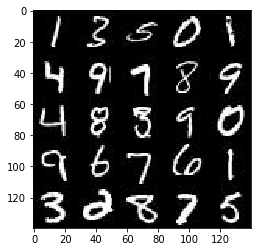

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

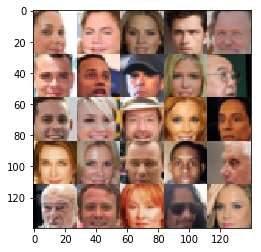

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/home/aind2/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate_placeholder = tf.placeholder(tf.float32, name='learning_rate')

    return input_real, input_z, learning_rate_placeholder


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2):        
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    # name variable scope 'discriminator' for building GAN model
    with tf.variable_scope('discriminator', reuse=reuse):
        # input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
        
        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    
    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # first fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # reshape it to start convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x256
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x128
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x64
                                
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
                
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
import numpy as np

def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                labels=tf.ones_like(d_model_real) * np.random.uniform(0.7, 1.2)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, learning_rate_placeholder = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    print_every = 10
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, 
                                               input_z: batch_z, 
                                               learning_rate_placeholder: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, 
                                               input_z: batch_z, 
                                               learning_rate_placeholder: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, 
                                                input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 20, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.4164... Generator Loss: 0.2504
Epoch 1/2... Discriminator Loss: 3.2825... Generator Loss: 0.2228
Epoch 1/2... Discriminator Loss: 1.9451... Generator Loss: 4.4734
Epoch 1/2... Discriminator Loss: 3.5953... Generator Loss: 5.3265
Epoch 1/2... Discriminator Loss: 1.8078... Generator Loss: 1.6695
Epoch 1/2... Discriminator Loss: 1.4412... Generator Loss: 1.0573
Epoch 1/2... Discriminator Loss: 1.3447... Generator Loss: 0.8912
Epoch 1/2... Discriminator Loss: 1.3444... Generator Loss: 1.4046
Epoch 1/2... Discriminator Loss: 1.2737... Generator Loss: 1.5845
Epoch 1/2... Discriminator Loss: 1.4190... Generator Loss: 1.9362


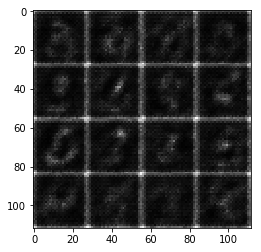

Epoch 1/2... Discriminator Loss: 1.3986... Generator Loss: 1.4682
Epoch 1/2... Discriminator Loss: 1.5098... Generator Loss: 1.6534
Epoch 1/2... Discriminator Loss: 1.3350... Generator Loss: 0.8700
Epoch 1/2... Discriminator Loss: 1.5541... Generator Loss: 0.4662
Epoch 1/2... Discriminator Loss: 1.2621... Generator Loss: 1.5298
Epoch 1/2... Discriminator Loss: 1.2808... Generator Loss: 1.1572
Epoch 1/2... Discriminator Loss: 1.5808... Generator Loss: 1.8066
Epoch 1/2... Discriminator Loss: 1.1977... Generator Loss: 1.0474
Epoch 1/2... Discriminator Loss: 1.4618... Generator Loss: 0.5779
Epoch 1/2... Discriminator Loss: 1.4535... Generator Loss: 0.5763


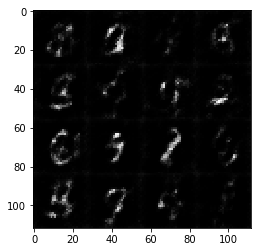

Epoch 1/2... Discriminator Loss: 1.1795... Generator Loss: 0.8066
Epoch 1/2... Discriminator Loss: 1.4678... Generator Loss: 0.5623
Epoch 1/2... Discriminator Loss: 1.2546... Generator Loss: 0.7116
Epoch 1/2... Discriminator Loss: 1.6966... Generator Loss: 0.4401
Epoch 1/2... Discriminator Loss: 0.9998... Generator Loss: 1.6599
Epoch 1/2... Discriminator Loss: 1.0907... Generator Loss: 1.7184
Epoch 1/2... Discriminator Loss: 1.0036... Generator Loss: 1.3947
Epoch 1/2... Discriminator Loss: 1.1629... Generator Loss: 0.8430
Epoch 1/2... Discriminator Loss: 1.0715... Generator Loss: 1.1583
Epoch 1/2... Discriminator Loss: 1.0691... Generator Loss: 2.0107


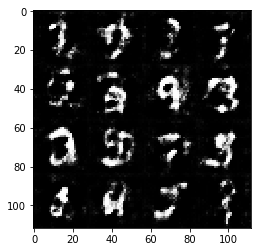

Epoch 1/2... Discriminator Loss: 1.0405... Generator Loss: 1.2045
Epoch 1/2... Discriminator Loss: 1.1017... Generator Loss: 1.3300
Epoch 1/2... Discriminator Loss: 1.1310... Generator Loss: 0.8642
Epoch 1/2... Discriminator Loss: 0.9531... Generator Loss: 1.3641
Epoch 1/2... Discriminator Loss: 1.4502... Generator Loss: 0.5775
Epoch 1/2... Discriminator Loss: 0.9372... Generator Loss: 1.6477
Epoch 1/2... Discriminator Loss: 1.1707... Generator Loss: 0.7940
Epoch 1/2... Discriminator Loss: 1.7879... Generator Loss: 0.4496
Epoch 1/2... Discriminator Loss: 1.5344... Generator Loss: 0.5221
Epoch 1/2... Discriminator Loss: 1.1511... Generator Loss: 0.8647


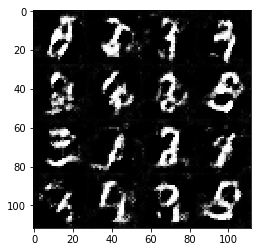

Epoch 1/2... Discriminator Loss: 1.9737... Generator Loss: 0.3775
Epoch 1/2... Discriminator Loss: 1.4342... Generator Loss: 0.5686
Epoch 1/2... Discriminator Loss: 1.4286... Generator Loss: 0.5912
Epoch 1/2... Discriminator Loss: 1.2418... Generator Loss: 0.7797
Epoch 1/2... Discriminator Loss: 1.2504... Generator Loss: 2.5516
Epoch 1/2... Discriminator Loss: 1.0414... Generator Loss: 1.5613
Epoch 1/2... Discriminator Loss: 1.2264... Generator Loss: 0.7375
Epoch 1/2... Discriminator Loss: 1.4334... Generator Loss: 2.6807
Epoch 1/2... Discriminator Loss: 1.1898... Generator Loss: 1.5012
Epoch 1/2... Discriminator Loss: 1.2646... Generator Loss: 1.8597


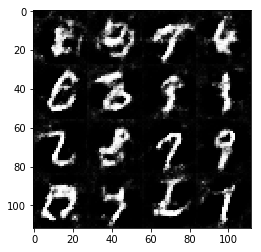

Epoch 1/2... Discriminator Loss: 1.1620... Generator Loss: 0.8542
Epoch 1/2... Discriminator Loss: 1.4709... Generator Loss: 0.5578
Epoch 1/2... Discriminator Loss: 1.2661... Generator Loss: 1.7264
Epoch 1/2... Discriminator Loss: 1.2951... Generator Loss: 0.7156
Epoch 1/2... Discriminator Loss: 1.1533... Generator Loss: 1.7812
Epoch 1/2... Discriminator Loss: 1.1752... Generator Loss: 1.5309
Epoch 1/2... Discriminator Loss: 1.1666... Generator Loss: 1.0524
Epoch 1/2... Discriminator Loss: 1.5647... Generator Loss: 0.4492
Epoch 1/2... Discriminator Loss: 1.4623... Generator Loss: 0.5478
Epoch 1/2... Discriminator Loss: 1.0975... Generator Loss: 1.1038


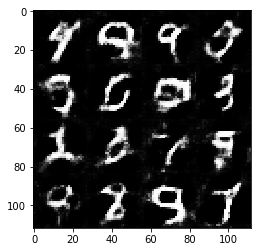

Epoch 1/2... Discriminator Loss: 1.1127... Generator Loss: 1.6658
Epoch 1/2... Discriminator Loss: 1.1223... Generator Loss: 1.3242
Epoch 1/2... Discriminator Loss: 1.0701... Generator Loss: 1.6312
Epoch 1/2... Discriminator Loss: 1.4443... Generator Loss: 0.5605
Epoch 1/2... Discriminator Loss: 1.1407... Generator Loss: 1.4628
Epoch 1/2... Discriminator Loss: 1.0136... Generator Loss: 1.4588
Epoch 1/2... Discriminator Loss: 1.1892... Generator Loss: 0.8108
Epoch 1/2... Discriminator Loss: 1.1879... Generator Loss: 0.8521
Epoch 1/2... Discriminator Loss: 1.2753... Generator Loss: 2.0384
Epoch 1/2... Discriminator Loss: 1.0384... Generator Loss: 1.1657


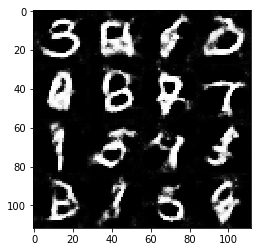

Epoch 1/2... Discriminator Loss: 1.2566... Generator Loss: 1.7581
Epoch 1/2... Discriminator Loss: 1.2347... Generator Loss: 1.3249
Epoch 1/2... Discriminator Loss: 1.2235... Generator Loss: 0.7809
Epoch 1/2... Discriminator Loss: 1.1180... Generator Loss: 1.0025
Epoch 1/2... Discriminator Loss: 1.1532... Generator Loss: 1.0353
Epoch 1/2... Discriminator Loss: 1.2531... Generator Loss: 1.6673
Epoch 1/2... Discriminator Loss: 1.4734... Generator Loss: 0.5506
Epoch 1/2... Discriminator Loss: 1.1017... Generator Loss: 0.9459
Epoch 1/2... Discriminator Loss: 1.2798... Generator Loss: 0.7141
Epoch 1/2... Discriminator Loss: 1.0047... Generator Loss: 1.2629


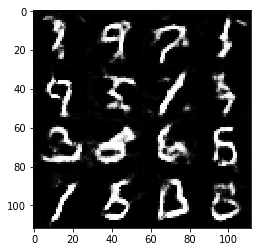

Epoch 1/2... Discriminator Loss: 1.2364... Generator Loss: 0.7287
Epoch 1/2... Discriminator Loss: 1.2077... Generator Loss: 0.7939
Epoch 1/2... Discriminator Loss: 1.4992... Generator Loss: 2.2261
Epoch 1/2... Discriminator Loss: 1.0482... Generator Loss: 1.5821
Epoch 1/2... Discriminator Loss: 1.4601... Generator Loss: 0.5779
Epoch 1/2... Discriminator Loss: 1.1293... Generator Loss: 2.0573
Epoch 1/2... Discriminator Loss: 1.0542... Generator Loss: 1.9842
Epoch 1/2... Discriminator Loss: 1.0898... Generator Loss: 1.0964
Epoch 1/2... Discriminator Loss: 1.0562... Generator Loss: 1.0978
Epoch 1/2... Discriminator Loss: 1.1942... Generator Loss: 1.8003


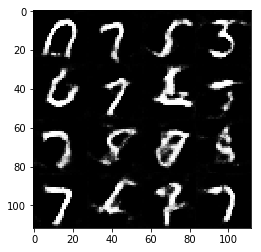

Epoch 1/2... Discriminator Loss: 1.0288... Generator Loss: 1.1484
Epoch 1/2... Discriminator Loss: 1.0679... Generator Loss: 1.0017
Epoch 1/2... Discriminator Loss: 1.1491... Generator Loss: 0.8617
Epoch 1/2... Discriminator Loss: 1.3918... Generator Loss: 0.6425
Epoch 1/2... Discriminator Loss: 0.9935... Generator Loss: 1.0371
Epoch 1/2... Discriminator Loss: 1.1073... Generator Loss: 0.9768
Epoch 1/2... Discriminator Loss: 1.4420... Generator Loss: 0.6687
Epoch 1/2... Discriminator Loss: 1.3367... Generator Loss: 0.6717
Epoch 1/2... Discriminator Loss: 1.0482... Generator Loss: 1.0400
Epoch 1/2... Discriminator Loss: 1.1668... Generator Loss: 0.8252


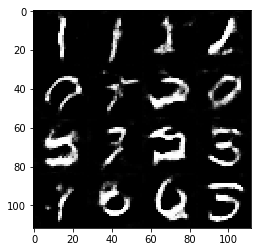

Epoch 1/2... Discriminator Loss: 1.0596... Generator Loss: 1.0937
Epoch 1/2... Discriminator Loss: 1.4415... Generator Loss: 0.5587
Epoch 1/2... Discriminator Loss: 1.0163... Generator Loss: 1.4384
Epoch 1/2... Discriminator Loss: 1.1540... Generator Loss: 0.8611
Epoch 1/2... Discriminator Loss: 1.1339... Generator Loss: 0.9730
Epoch 1/2... Discriminator Loss: 1.0881... Generator Loss: 1.8576
Epoch 1/2... Discriminator Loss: 1.1422... Generator Loss: 1.2949
Epoch 1/2... Discriminator Loss: 1.1213... Generator Loss: 0.9162
Epoch 1/2... Discriminator Loss: 1.1654... Generator Loss: 1.7841
Epoch 1/2... Discriminator Loss: 1.2601... Generator Loss: 1.6641


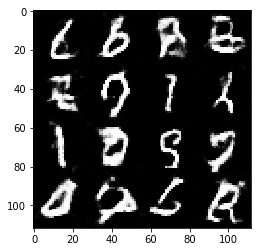

Epoch 1/2... Discriminator Loss: 1.0421... Generator Loss: 1.0571
Epoch 1/2... Discriminator Loss: 1.1573... Generator Loss: 0.8602
Epoch 1/2... Discriminator Loss: 1.0668... Generator Loss: 1.4541
Epoch 1/2... Discriminator Loss: 1.4194... Generator Loss: 0.5679
Epoch 1/2... Discriminator Loss: 1.0922... Generator Loss: 1.2108
Epoch 1/2... Discriminator Loss: 1.0931... Generator Loss: 0.9163
Epoch 1/2... Discriminator Loss: 0.9649... Generator Loss: 1.1770
Epoch 1/2... Discriminator Loss: 1.1073... Generator Loss: 1.5033
Epoch 1/2... Discriminator Loss: 1.1596... Generator Loss: 0.8687
Epoch 1/2... Discriminator Loss: 1.2153... Generator Loss: 0.7506


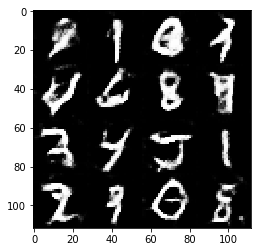

Epoch 1/2... Discriminator Loss: 1.5751... Generator Loss: 0.5290
Epoch 1/2... Discriminator Loss: 0.9214... Generator Loss: 1.5361
Epoch 1/2... Discriminator Loss: 1.4454... Generator Loss: 0.5569
Epoch 1/2... Discriminator Loss: 2.2462... Generator Loss: 0.2879
Epoch 1/2... Discriminator Loss: 1.1508... Generator Loss: 0.7918
Epoch 1/2... Discriminator Loss: 1.0525... Generator Loss: 0.9806
Epoch 1/2... Discriminator Loss: 1.0166... Generator Loss: 1.0217
Epoch 1/2... Discriminator Loss: 0.9766... Generator Loss: 1.0746
Epoch 1/2... Discriminator Loss: 1.0265... Generator Loss: 1.0295
Epoch 1/2... Discriminator Loss: 1.2964... Generator Loss: 0.6556


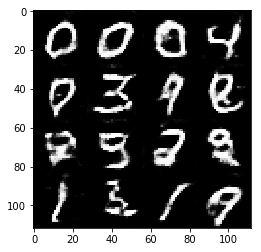

Epoch 1/2... Discriminator Loss: 0.9904... Generator Loss: 1.5042
Epoch 1/2... Discriminator Loss: 1.6645... Generator Loss: 2.1696
Epoch 1/2... Discriminator Loss: 1.1787... Generator Loss: 1.7582
Epoch 1/2... Discriminator Loss: 1.0540... Generator Loss: 1.0348
Epoch 1/2... Discriminator Loss: 0.9552... Generator Loss: 1.4257
Epoch 1/2... Discriminator Loss: 1.1754... Generator Loss: 0.7672
Epoch 1/2... Discriminator Loss: 1.1460... Generator Loss: 0.8151
Epoch 1/2... Discriminator Loss: 1.3875... Generator Loss: 0.6078
Epoch 1/2... Discriminator Loss: 1.6079... Generator Loss: 0.4901
Epoch 1/2... Discriminator Loss: 1.2620... Generator Loss: 0.7019


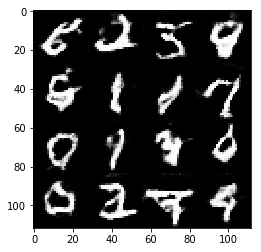

Epoch 1/2... Discriminator Loss: 1.2394... Generator Loss: 1.4749
Epoch 1/2... Discriminator Loss: 1.0268... Generator Loss: 1.0620
Epoch 1/2... Discriminator Loss: 1.1508... Generator Loss: 0.8582
Epoch 1/2... Discriminator Loss: 0.9863... Generator Loss: 1.7416
Epoch 1/2... Discriminator Loss: 1.6047... Generator Loss: 0.5510
Epoch 1/2... Discriminator Loss: 1.1247... Generator Loss: 0.8391
Epoch 1/2... Discriminator Loss: 1.0237... Generator Loss: 1.3318
Epoch 1/2... Discriminator Loss: 1.0687... Generator Loss: 0.9801
Epoch 1/2... Discriminator Loss: 0.8816... Generator Loss: 1.5206
Epoch 1/2... Discriminator Loss: 1.8994... Generator Loss: 0.3716


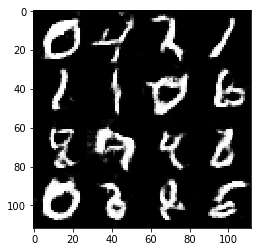

Epoch 1/2... Discriminator Loss: 0.9655... Generator Loss: 1.4378
Epoch 1/2... Discriminator Loss: 1.0394... Generator Loss: 0.9208
Epoch 1/2... Discriminator Loss: 1.0625... Generator Loss: 1.0536
Epoch 1/2... Discriminator Loss: 0.9805... Generator Loss: 1.2196
Epoch 1/2... Discriminator Loss: 0.9915... Generator Loss: 1.1090
Epoch 1/2... Discriminator Loss: 1.0938... Generator Loss: 0.9415
Epoch 1/2... Discriminator Loss: 1.4602... Generator Loss: 0.5933
Epoch 1/2... Discriminator Loss: 1.7419... Generator Loss: 0.4315
Epoch 1/2... Discriminator Loss: 1.0575... Generator Loss: 0.9444
Epoch 1/2... Discriminator Loss: 0.8908... Generator Loss: 1.6070


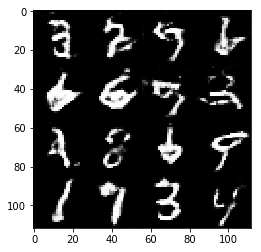

Epoch 1/2... Discriminator Loss: 1.3736... Generator Loss: 0.6117
Epoch 1/2... Discriminator Loss: 0.9621... Generator Loss: 2.1157
Epoch 1/2... Discriminator Loss: 1.3587... Generator Loss: 0.6461
Epoch 1/2... Discriminator Loss: 1.0123... Generator Loss: 1.2966
Epoch 1/2... Discriminator Loss: 1.0345... Generator Loss: 1.0097
Epoch 1/2... Discriminator Loss: 0.9410... Generator Loss: 1.3111
Epoch 1/2... Discriminator Loss: 1.1556... Generator Loss: 0.8157
Epoch 1/2... Discriminator Loss: 1.6186... Generator Loss: 0.5750
Epoch 1/2... Discriminator Loss: 1.0585... Generator Loss: 1.1317
Epoch 1/2... Discriminator Loss: 1.0053... Generator Loss: 1.0428


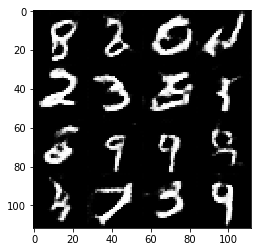

Epoch 1/2... Discriminator Loss: 1.0209... Generator Loss: 1.0249
Epoch 1/2... Discriminator Loss: 2.2913... Generator Loss: 0.2773
Epoch 1/2... Discriminator Loss: 1.0387... Generator Loss: 0.9726
Epoch 1/2... Discriminator Loss: 0.9553... Generator Loss: 1.3621
Epoch 1/2... Discriminator Loss: 0.9505... Generator Loss: 1.2158
Epoch 1/2... Discriminator Loss: 1.7422... Generator Loss: 0.3828
Epoch 1/2... Discriminator Loss: 1.2551... Generator Loss: 0.7930
Epoch 1/2... Discriminator Loss: 1.0805... Generator Loss: 0.9955
Epoch 1/2... Discriminator Loss: 1.2598... Generator Loss: 0.7293
Epoch 1/2... Discriminator Loss: 1.0529... Generator Loss: 1.2712


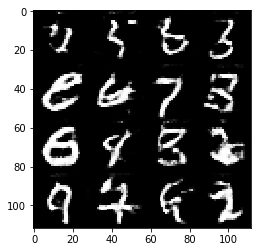

Epoch 1/2... Discriminator Loss: 0.8555... Generator Loss: 1.3287
Epoch 1/2... Discriminator Loss: 1.3060... Generator Loss: 0.6555
Epoch 1/2... Discriminator Loss: 1.5847... Generator Loss: 0.6420
Epoch 1/2... Discriminator Loss: 1.5813... Generator Loss: 0.4945
Epoch 1/2... Discriminator Loss: 1.0503... Generator Loss: 0.9416
Epoch 1/2... Discriminator Loss: 0.9396... Generator Loss: 1.3459
Epoch 1/2... Discriminator Loss: 1.6359... Generator Loss: 2.4313
Epoch 2/2... Discriminator Loss: 1.2127... Generator Loss: 0.7595
Epoch 2/2... Discriminator Loss: 0.9988... Generator Loss: 1.0406
Epoch 2/2... Discriminator Loss: 0.9569... Generator Loss: 1.1002


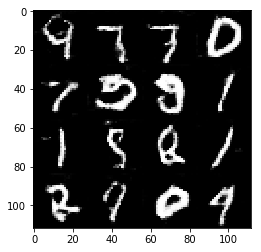

Epoch 2/2... Discriminator Loss: 1.1401... Generator Loss: 0.8884
Epoch 2/2... Discriminator Loss: 1.5556... Generator Loss: 0.5182
Epoch 2/2... Discriminator Loss: 1.1540... Generator Loss: 0.8363
Epoch 2/2... Discriminator Loss: 1.1806... Generator Loss: 0.8211
Epoch 2/2... Discriminator Loss: 1.0763... Generator Loss: 0.9759
Epoch 2/2... Discriminator Loss: 1.0022... Generator Loss: 1.9809
Epoch 2/2... Discriminator Loss: 1.3832... Generator Loss: 0.6625
Epoch 2/2... Discriminator Loss: 1.2618... Generator Loss: 0.7582
Epoch 2/2... Discriminator Loss: 0.8973... Generator Loss: 1.9874
Epoch 2/2... Discriminator Loss: 1.5739... Generator Loss: 0.5582


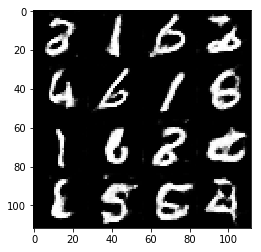

Epoch 2/2... Discriminator Loss: 0.8972... Generator Loss: 1.5838
Epoch 2/2... Discriminator Loss: 0.8519... Generator Loss: 1.3349
Epoch 2/2... Discriminator Loss: 1.2022... Generator Loss: 0.8000
Epoch 2/2... Discriminator Loss: 0.7503... Generator Loss: 1.9079
Epoch 2/2... Discriminator Loss: 0.8342... Generator Loss: 1.4494
Epoch 2/2... Discriminator Loss: 0.9596... Generator Loss: 1.1479
Epoch 2/2... Discriminator Loss: 0.8370... Generator Loss: 1.8259
Epoch 2/2... Discriminator Loss: 2.6153... Generator Loss: 4.2137
Epoch 2/2... Discriminator Loss: 1.0980... Generator Loss: 0.8976
Epoch 2/2... Discriminator Loss: 1.0249... Generator Loss: 1.0961


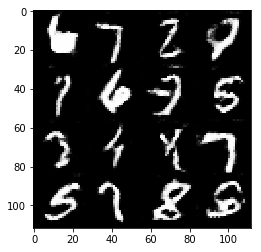

Epoch 2/2... Discriminator Loss: 1.0117... Generator Loss: 1.0895
Epoch 2/2... Discriminator Loss: 0.9078... Generator Loss: 1.2084
Epoch 2/2... Discriminator Loss: 0.9596... Generator Loss: 1.0893
Epoch 2/2... Discriminator Loss: 1.6870... Generator Loss: 0.4856
Epoch 2/2... Discriminator Loss: 1.2119... Generator Loss: 0.8525
Epoch 2/2... Discriminator Loss: 1.4955... Generator Loss: 0.5462
Epoch 2/2... Discriminator Loss: 0.8806... Generator Loss: 1.3566
Epoch 2/2... Discriminator Loss: 0.8435... Generator Loss: 1.4389
Epoch 2/2... Discriminator Loss: 2.1036... Generator Loss: 0.3047
Epoch 2/2... Discriminator Loss: 1.0374... Generator Loss: 1.0205


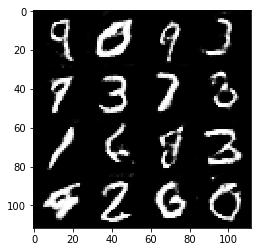

Epoch 2/2... Discriminator Loss: 0.8346... Generator Loss: 1.7141
Epoch 2/2... Discriminator Loss: 1.1463... Generator Loss: 0.8837
Epoch 2/2... Discriminator Loss: 1.1415... Generator Loss: 0.8308
Epoch 2/2... Discriminator Loss: 0.7871... Generator Loss: 2.0650
Epoch 2/2... Discriminator Loss: 0.8368... Generator Loss: 2.0180
Epoch 2/2... Discriminator Loss: 0.9189... Generator Loss: 1.1784
Epoch 2/2... Discriminator Loss: 1.0967... Generator Loss: 0.9375
Epoch 2/2... Discriminator Loss: 0.9823... Generator Loss: 2.1644
Epoch 2/2... Discriminator Loss: 0.8090... Generator Loss: 1.7132
Epoch 2/2... Discriminator Loss: 1.1386... Generator Loss: 0.8608


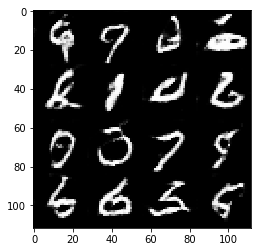

Epoch 2/2... Discriminator Loss: 1.1691... Generator Loss: 2.4229
Epoch 2/2... Discriminator Loss: 1.0114... Generator Loss: 1.0505
Epoch 2/2... Discriminator Loss: 0.8243... Generator Loss: 1.4753
Epoch 2/2... Discriminator Loss: 1.0818... Generator Loss: 0.9388
Epoch 2/2... Discriminator Loss: 1.4284... Generator Loss: 0.7030
Epoch 2/2... Discriminator Loss: 1.1119... Generator Loss: 0.9985
Epoch 2/2... Discriminator Loss: 0.7662... Generator Loss: 1.7936
Epoch 2/2... Discriminator Loss: 0.7667... Generator Loss: 1.6269
Epoch 2/2... Discriminator Loss: 1.2070... Generator Loss: 0.8161
Epoch 2/2... Discriminator Loss: 1.3761... Generator Loss: 0.6258


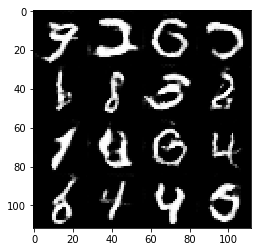

Epoch 2/2... Discriminator Loss: 1.3512... Generator Loss: 0.6597
Epoch 2/2... Discriminator Loss: 1.0715... Generator Loss: 0.9651
Epoch 2/2... Discriminator Loss: 1.0325... Generator Loss: 0.9838
Epoch 2/2... Discriminator Loss: 0.8442... Generator Loss: 1.3768
Epoch 2/2... Discriminator Loss: 1.1344... Generator Loss: 0.8581
Epoch 2/2... Discriminator Loss: 0.8733... Generator Loss: 1.7108
Epoch 2/2... Discriminator Loss: 1.1412... Generator Loss: 0.8768
Epoch 2/2... Discriminator Loss: 0.9450... Generator Loss: 1.1624
Epoch 2/2... Discriminator Loss: 0.8353... Generator Loss: 1.8883
Epoch 2/2... Discriminator Loss: 1.3544... Generator Loss: 2.1459


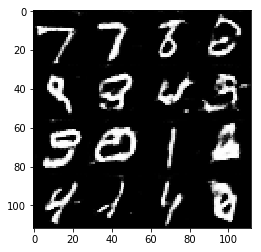

Epoch 2/2... Discriminator Loss: 1.0294... Generator Loss: 1.0500
Epoch 2/2... Discriminator Loss: 1.3422... Generator Loss: 0.6641
Epoch 2/2... Discriminator Loss: 1.1185... Generator Loss: 0.8639
Epoch 2/2... Discriminator Loss: 0.8864... Generator Loss: 1.3503
Epoch 2/2... Discriminator Loss: 0.9380... Generator Loss: 1.6368
Epoch 2/2... Discriminator Loss: 0.8569... Generator Loss: 1.5329
Epoch 2/2... Discriminator Loss: 0.8496... Generator Loss: 1.4808
Epoch 2/2... Discriminator Loss: 0.8510... Generator Loss: 1.6515
Epoch 2/2... Discriminator Loss: 0.9996... Generator Loss: 1.0565
Epoch 2/2... Discriminator Loss: 1.3880... Generator Loss: 0.6060


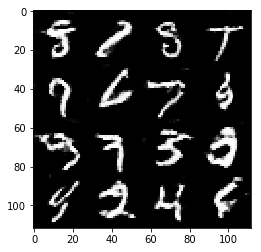

Epoch 2/2... Discriminator Loss: 1.6287... Generator Loss: 0.5479
Epoch 2/2... Discriminator Loss: 0.9921... Generator Loss: 1.1225
Epoch 2/2... Discriminator Loss: 0.8510... Generator Loss: 1.4631
Epoch 2/2... Discriminator Loss: 0.8810... Generator Loss: 1.9925
Epoch 2/2... Discriminator Loss: 1.0623... Generator Loss: 1.8191
Epoch 2/2... Discriminator Loss: 0.9412... Generator Loss: 2.0142
Epoch 2/2... Discriminator Loss: 0.9291... Generator Loss: 1.1671
Epoch 2/2... Discriminator Loss: 1.1011... Generator Loss: 2.4777
Epoch 2/2... Discriminator Loss: 1.0798... Generator Loss: 1.0707
Epoch 2/2... Discriminator Loss: 0.9345... Generator Loss: 1.1077


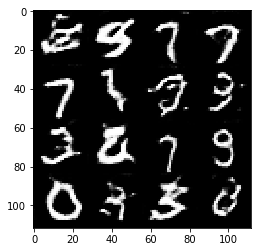

Epoch 2/2... Discriminator Loss: 0.8336... Generator Loss: 1.4004
Epoch 2/2... Discriminator Loss: 1.2491... Generator Loss: 0.7421
Epoch 2/2... Discriminator Loss: 0.8064... Generator Loss: 1.5452
Epoch 2/2... Discriminator Loss: 2.0367... Generator Loss: 0.3882
Epoch 2/2... Discriminator Loss: 0.8863... Generator Loss: 1.2338
Epoch 2/2... Discriminator Loss: 0.8316... Generator Loss: 1.5282
Epoch 2/2... Discriminator Loss: 1.4885... Generator Loss: 0.6417
Epoch 2/2... Discriminator Loss: 1.0716... Generator Loss: 0.9614
Epoch 2/2... Discriminator Loss: 1.3098... Generator Loss: 0.7957
Epoch 2/2... Discriminator Loss: 1.2374... Generator Loss: 0.7904


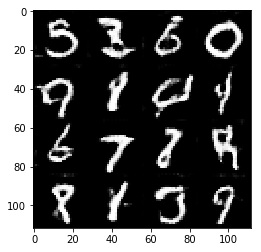

Epoch 2/2... Discriminator Loss: 0.7749... Generator Loss: 1.6643
Epoch 2/2... Discriminator Loss: 0.9085... Generator Loss: 1.2541
Epoch 2/2... Discriminator Loss: 0.8151... Generator Loss: 1.9603
Epoch 2/2... Discriminator Loss: 0.8621... Generator Loss: 1.3199
Epoch 2/2... Discriminator Loss: 1.5608... Generator Loss: 0.6123
Epoch 2/2... Discriminator Loss: 1.0126... Generator Loss: 1.7730
Epoch 2/2... Discriminator Loss: 0.7692... Generator Loss: 1.7503
Epoch 2/2... Discriminator Loss: 0.8882... Generator Loss: 1.8391
Epoch 2/2... Discriminator Loss: 1.1745... Generator Loss: 2.0563
Epoch 2/2... Discriminator Loss: 0.9737... Generator Loss: 1.2161


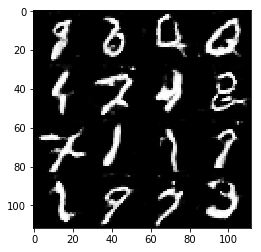

Epoch 2/2... Discriminator Loss: 0.7727... Generator Loss: 1.8506
Epoch 2/2... Discriminator Loss: 0.7849... Generator Loss: 1.5932
Epoch 2/2... Discriminator Loss: 0.9882... Generator Loss: 1.0683
Epoch 2/2... Discriminator Loss: 1.0071... Generator Loss: 1.0510
Epoch 2/2... Discriminator Loss: 0.8087... Generator Loss: 1.6927
Epoch 2/2... Discriminator Loss: 0.8666... Generator Loss: 1.4122
Epoch 2/2... Discriminator Loss: 1.1715... Generator Loss: 0.9243
Epoch 2/2... Discriminator Loss: 0.8377... Generator Loss: 1.5519
Epoch 2/2... Discriminator Loss: 1.1617... Generator Loss: 0.8481
Epoch 2/2... Discriminator Loss: 0.8627... Generator Loss: 1.3793


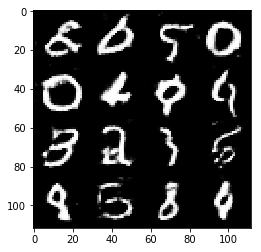

Epoch 2/2... Discriminator Loss: 0.7953... Generator Loss: 1.7099
Epoch 2/2... Discriminator Loss: 1.7900... Generator Loss: 0.4807
Epoch 2/2... Discriminator Loss: 0.9288... Generator Loss: 1.2561
Epoch 2/2... Discriminator Loss: 1.0782... Generator Loss: 0.9439
Epoch 2/2... Discriminator Loss: 0.9914... Generator Loss: 1.1260
Epoch 2/2... Discriminator Loss: 0.7715... Generator Loss: 1.5661
Epoch 2/2... Discriminator Loss: 0.8594... Generator Loss: 1.5771
Epoch 2/2... Discriminator Loss: 1.0843... Generator Loss: 1.9647
Epoch 2/2... Discriminator Loss: 1.0515... Generator Loss: 0.9846
Epoch 2/2... Discriminator Loss: 0.7990... Generator Loss: 2.0665


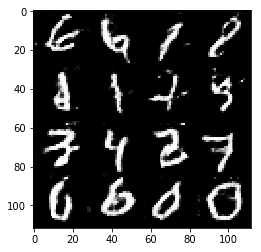

Epoch 2/2... Discriminator Loss: 0.7386... Generator Loss: 1.6859
Epoch 2/2... Discriminator Loss: 1.0166... Generator Loss: 1.1753
Epoch 2/2... Discriminator Loss: 0.7457... Generator Loss: 1.7138
Epoch 2/2... Discriminator Loss: 1.4968... Generator Loss: 0.6227
Epoch 2/2... Discriminator Loss: 0.8507... Generator Loss: 1.5754
Epoch 2/2... Discriminator Loss: 1.3953... Generator Loss: 0.6543
Epoch 2/2... Discriminator Loss: 0.8698... Generator Loss: 1.3165
Epoch 2/2... Discriminator Loss: 0.7426... Generator Loss: 1.6617
Epoch 2/2... Discriminator Loss: 1.6511... Generator Loss: 3.5887
Epoch 2/2... Discriminator Loss: 1.1384... Generator Loss: 0.8330


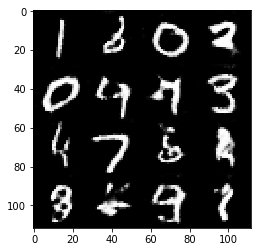

Epoch 2/2... Discriminator Loss: 0.8674... Generator Loss: 1.2859
Epoch 2/2... Discriminator Loss: 0.9584... Generator Loss: 1.1938
Epoch 2/2... Discriminator Loss: 0.7879... Generator Loss: 1.9937
Epoch 2/2... Discriminator Loss: 0.7187... Generator Loss: 1.9799
Epoch 2/2... Discriminator Loss: 0.7196... Generator Loss: 1.8187
Epoch 2/2... Discriminator Loss: 1.1706... Generator Loss: 0.8361
Epoch 2/2... Discriminator Loss: 0.8770... Generator Loss: 1.3019
Epoch 2/2... Discriminator Loss: 1.2397... Generator Loss: 2.6589
Epoch 2/2... Discriminator Loss: 1.1112... Generator Loss: 1.6647
Epoch 2/2... Discriminator Loss: 0.9702... Generator Loss: 1.1156


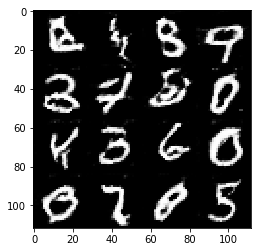

Epoch 2/2... Discriminator Loss: 1.4764... Generator Loss: 0.6026
Epoch 2/2... Discriminator Loss: 0.7995... Generator Loss: 1.7811
Epoch 2/2... Discriminator Loss: 0.8143... Generator Loss: 1.5670
Epoch 2/2... Discriminator Loss: 0.7108... Generator Loss: 1.8353
Epoch 2/2... Discriminator Loss: 1.2419... Generator Loss: 0.7881
Epoch 2/2... Discriminator Loss: 0.8756... Generator Loss: 1.8490
Epoch 2/2... Discriminator Loss: 0.8729... Generator Loss: 1.3885
Epoch 2/2... Discriminator Loss: 1.2861... Generator Loss: 0.7040
Epoch 2/2... Discriminator Loss: 1.6165... Generator Loss: 0.5058
Epoch 2/2... Discriminator Loss: 0.7092... Generator Loss: 2.2675


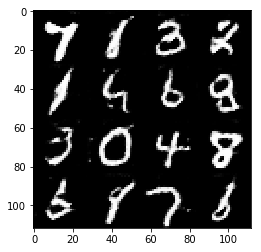

Epoch 2/2... Discriminator Loss: 0.7962... Generator Loss: 1.5409
Epoch 2/2... Discriminator Loss: 1.0529... Generator Loss: 0.9951
Epoch 2/2... Discriminator Loss: 1.2063... Generator Loss: 0.8649
Epoch 2/2... Discriminator Loss: 1.0539... Generator Loss: 2.7497
Epoch 2/2... Discriminator Loss: 1.3705... Generator Loss: 0.6979
Epoch 2/2... Discriminator Loss: 1.1251... Generator Loss: 3.1224
Epoch 2/2... Discriminator Loss: 1.1388... Generator Loss: 0.8902
Epoch 2/2... Discriminator Loss: 1.0058... Generator Loss: 1.0580
Epoch 2/2... Discriminator Loss: 1.1109... Generator Loss: 0.9696
Epoch 2/2... Discriminator Loss: 1.0249... Generator Loss: 1.8587


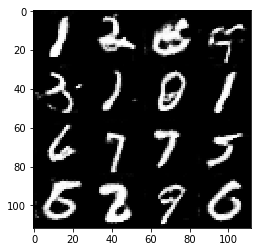

Epoch 2/2... Discriminator Loss: 0.7618... Generator Loss: 2.1176
Epoch 2/2... Discriminator Loss: 0.8971... Generator Loss: 1.2532
Epoch 2/2... Discriminator Loss: 0.8910... Generator Loss: 1.3286
Epoch 2/2... Discriminator Loss: 0.8772... Generator Loss: 1.3577
Epoch 2/2... Discriminator Loss: 0.9083... Generator Loss: 2.7246
Epoch 2/2... Discriminator Loss: 0.8451... Generator Loss: 1.6173
Epoch 2/2... Discriminator Loss: 0.9892... Generator Loss: 1.0344
Epoch 2/2... Discriminator Loss: 0.9087... Generator Loss: 1.2435
Epoch 2/2... Discriminator Loss: 1.5511... Generator Loss: 0.5972
Epoch 2/2... Discriminator Loss: 1.1358... Generator Loss: 0.9091


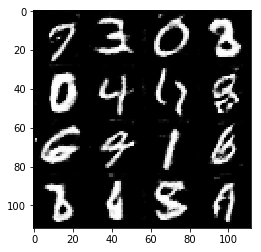

Epoch 2/2... Discriminator Loss: 0.9697... Generator Loss: 2.1146
Epoch 2/2... Discriminator Loss: 0.8741... Generator Loss: 1.5040
Epoch 2/2... Discriminator Loss: 0.8734... Generator Loss: 1.2883
Epoch 2/2... Discriminator Loss: 0.9323... Generator Loss: 1.3001
Epoch 2/2... Discriminator Loss: 0.8828... Generator Loss: 1.2846
Epoch 2/2... Discriminator Loss: 0.7539... Generator Loss: 1.6935
Epoch 2/2... Discriminator Loss: 1.6321... Generator Loss: 3.4750
Epoch 2/2... Discriminator Loss: 1.4449... Generator Loss: 2.6245
Epoch 2/2... Discriminator Loss: 0.8970... Generator Loss: 2.0094
Epoch 2/2... Discriminator Loss: 0.8162... Generator Loss: 2.0913


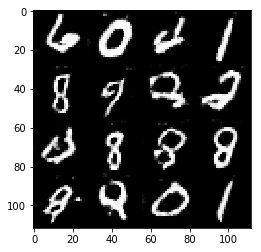

Epoch 2/2... Discriminator Loss: 0.7481... Generator Loss: 1.9755
Epoch 2/2... Discriminator Loss: 0.7616... Generator Loss: 1.9646
Epoch 2/2... Discriminator Loss: 0.7594... Generator Loss: 2.0994
Epoch 2/2... Discriminator Loss: 0.7966... Generator Loss: 1.7702
Epoch 2/2... Discriminator Loss: 1.4096... Generator Loss: 0.7094


In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 4.0550... Generator Loss: 0.0802
Epoch 1/1... Discriminator Loss: 2.6293... Generator Loss: 0.3119
Epoch 1/1... Discriminator Loss: 3.4335... Generator Loss: 0.1102
Epoch 1/1... Discriminator Loss: 2.3451... Generator Loss: 0.2778
Epoch 1/1... Discriminator Loss: 2.1548... Generator Loss: 0.3788
Epoch 1/1... Discriminator Loss: 1.8999... Generator Loss: 0.4177
Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 0.8466
Epoch 1/1... Discriminator Loss: 1.1522... Generator Loss: 3.2665
Epoch 1/1... Discriminator Loss: 1.1495... Generator Loss: 3.4797
Epoch 1/1... Discriminator Loss: 1.0438... Generator Loss: 2.6645


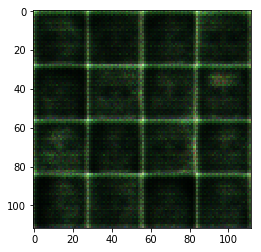

Epoch 1/1... Discriminator Loss: 1.0762... Generator Loss: 1.0981
Epoch 1/1... Discriminator Loss: 0.7977... Generator Loss: 2.8306
Epoch 1/1... Discriminator Loss: 1.0176... Generator Loss: 3.5840
Epoch 1/1... Discriminator Loss: 0.9103... Generator Loss: 3.9422
Epoch 1/1... Discriminator Loss: 0.6562... Generator Loss: 3.4596
Epoch 1/1... Discriminator Loss: 0.8543... Generator Loss: 3.4990
Epoch 1/1... Discriminator Loss: 1.8436... Generator Loss: 4.2634
Epoch 1/1... Discriminator Loss: 0.7702... Generator Loss: 4.1684
Epoch 1/1... Discriminator Loss: 0.8262... Generator Loss: 1.9929
Epoch 1/1... Discriminator Loss: 0.7867... Generator Loss: 2.0592


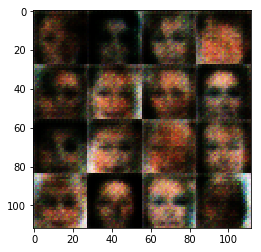

Epoch 1/1... Discriminator Loss: 0.7180... Generator Loss: 3.0542
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 1.9331
Epoch 1/1... Discriminator Loss: 1.4605... Generator Loss: 0.6046
Epoch 1/1... Discriminator Loss: 0.8094... Generator Loss: 2.3633
Epoch 1/1... Discriminator Loss: 2.6176... Generator Loss: 3.7954
Epoch 1/1... Discriminator Loss: 0.9168... Generator Loss: 1.4096
Epoch 1/1... Discriminator Loss: 0.6736... Generator Loss: 2.5299
Epoch 1/1... Discriminator Loss: 1.6982... Generator Loss: 5.3744
Epoch 1/1... Discriminator Loss: 2.5571... Generator Loss: 0.1722
Epoch 1/1... Discriminator Loss: 0.7754... Generator Loss: 1.9633


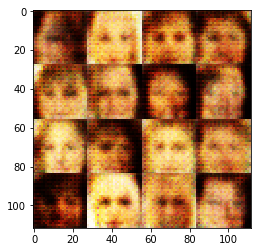

Epoch 1/1... Discriminator Loss: 0.9712... Generator Loss: 1.1902
Epoch 1/1... Discriminator Loss: 0.8898... Generator Loss: 1.4000
Epoch 1/1... Discriminator Loss: 1.8457... Generator Loss: 0.3844
Epoch 1/1... Discriminator Loss: 1.2826... Generator Loss: 0.8541
Epoch 1/1... Discriminator Loss: 0.8242... Generator Loss: 1.9108
Epoch 1/1... Discriminator Loss: 1.6358... Generator Loss: 3.3255
Epoch 1/1... Discriminator Loss: 0.8485... Generator Loss: 2.9459
Epoch 1/1... Discriminator Loss: 1.1722... Generator Loss: 2.4418
Epoch 1/1... Discriminator Loss: 1.3254... Generator Loss: 0.8218
Epoch 1/1... Discriminator Loss: 1.5707... Generator Loss: 0.5478


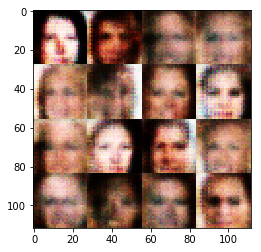

Epoch 1/1... Discriminator Loss: 0.7743... Generator Loss: 2.1061
Epoch 1/1... Discriminator Loss: 0.6550... Generator Loss: 2.7767
Epoch 1/1... Discriminator Loss: 0.7381... Generator Loss: 3.3861
Epoch 1/1... Discriminator Loss: 0.7421... Generator Loss: 2.9284
Epoch 1/1... Discriminator Loss: 0.7568... Generator Loss: 2.8841
Epoch 1/1... Discriminator Loss: 0.8581... Generator Loss: 2.1504
Epoch 1/1... Discriminator Loss: 0.6784... Generator Loss: 3.0241
Epoch 1/1... Discriminator Loss: 0.8260... Generator Loss: 1.9727
Epoch 1/1... Discriminator Loss: 1.4995... Generator Loss: 0.6490
Epoch 1/1... Discriminator Loss: 1.2800... Generator Loss: 0.7309


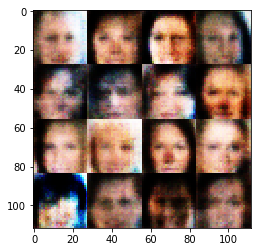

Epoch 1/1... Discriminator Loss: 0.8775... Generator Loss: 1.4705
Epoch 1/1... Discriminator Loss: 1.0774... Generator Loss: 3.6579
Epoch 1/1... Discriminator Loss: 1.1453... Generator Loss: 0.9612
Epoch 1/1... Discriminator Loss: 0.8069... Generator Loss: 1.6988
Epoch 1/1... Discriminator Loss: 1.4491... Generator Loss: 3.0542
Epoch 1/1... Discriminator Loss: 1.1491... Generator Loss: 1.8812
Epoch 1/1... Discriminator Loss: 0.8706... Generator Loss: 3.7124
Epoch 1/1... Discriminator Loss: 1.6126... Generator Loss: 2.1570
Epoch 1/1... Discriminator Loss: 1.0619... Generator Loss: 1.2817
Epoch 1/1... Discriminator Loss: 0.6845... Generator Loss: 2.7653


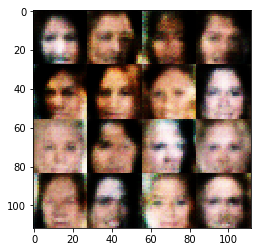

Epoch 1/1... Discriminator Loss: 0.8973... Generator Loss: 1.4359
Epoch 1/1... Discriminator Loss: 0.7427... Generator Loss: 3.0018
Epoch 1/1... Discriminator Loss: 1.0930... Generator Loss: 2.2094
Epoch 1/1... Discriminator Loss: 0.8550... Generator Loss: 1.5139
Epoch 1/1... Discriminator Loss: 1.3115... Generator Loss: 3.3061
Epoch 1/1... Discriminator Loss: 0.8024... Generator Loss: 3.3284
Epoch 1/1... Discriminator Loss: 0.7242... Generator Loss: 3.5591
Epoch 1/1... Discriminator Loss: 1.4126... Generator Loss: 0.6269
Epoch 1/1... Discriminator Loss: 0.8991... Generator Loss: 3.9435
Epoch 1/1... Discriminator Loss: 1.8159... Generator Loss: 3.3330


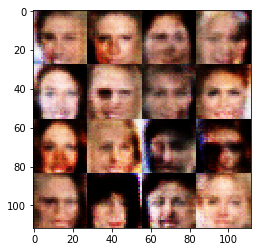

Epoch 1/1... Discriminator Loss: 1.0545... Generator Loss: 2.0680
Epoch 1/1... Discriminator Loss: 1.1613... Generator Loss: 0.8419
Epoch 1/1... Discriminator Loss: 0.8538... Generator Loss: 1.9779
Epoch 1/1... Discriminator Loss: 0.6569... Generator Loss: 2.8541
Epoch 1/1... Discriminator Loss: 0.7015... Generator Loss: 2.8173
Epoch 1/1... Discriminator Loss: 0.7961... Generator Loss: 3.7341
Epoch 1/1... Discriminator Loss: 0.9152... Generator Loss: 1.3112
Epoch 1/1... Discriminator Loss: 1.4914... Generator Loss: 0.5251
Epoch 1/1... Discriminator Loss: 0.6568... Generator Loss: 3.3535
Epoch 1/1... Discriminator Loss: 0.9745... Generator Loss: 1.2012


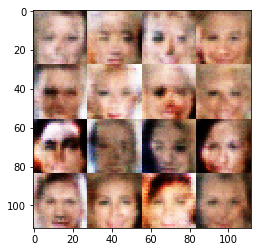

Epoch 1/1... Discriminator Loss: 0.6064... Generator Loss: 3.5091
Epoch 1/1... Discriminator Loss: 1.4535... Generator Loss: 1.1466
Epoch 1/1... Discriminator Loss: 1.2582... Generator Loss: 2.3096
Epoch 1/1... Discriminator Loss: 0.9591... Generator Loss: 3.0034
Epoch 1/1... Discriminator Loss: 0.6426... Generator Loss: 3.2072
Epoch 1/1... Discriminator Loss: 1.8607... Generator Loss: 2.1596
Epoch 1/1... Discriminator Loss: 0.9946... Generator Loss: 1.8260
Epoch 1/1... Discriminator Loss: 0.9008... Generator Loss: 1.3031
Epoch 1/1... Discriminator Loss: 0.7406... Generator Loss: 1.8960
Epoch 1/1... Discriminator Loss: 1.1616... Generator Loss: 0.9075


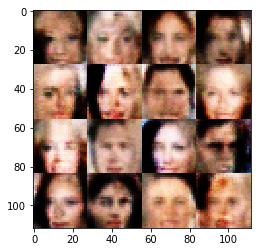

Epoch 1/1... Discriminator Loss: 1.0021... Generator Loss: 3.4380
Epoch 1/1... Discriminator Loss: 0.6833... Generator Loss: 2.3893
Epoch 1/1... Discriminator Loss: 1.0270... Generator Loss: 1.0923
Epoch 1/1... Discriminator Loss: 1.1378... Generator Loss: 3.7588
Epoch 1/1... Discriminator Loss: 0.6422... Generator Loss: 3.4129
Epoch 1/1... Discriminator Loss: 0.9280... Generator Loss: 1.3098
Epoch 1/1... Discriminator Loss: 1.1211... Generator Loss: 0.9227
Epoch 1/1... Discriminator Loss: 1.0957... Generator Loss: 1.0971
Epoch 1/1... Discriminator Loss: 1.4658... Generator Loss: 0.5599
Epoch 1/1... Discriminator Loss: 1.1715... Generator Loss: 0.8798


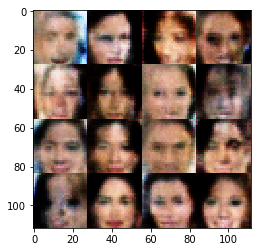

Epoch 1/1... Discriminator Loss: 0.6504... Generator Loss: 2.6556
Epoch 1/1... Discriminator Loss: 1.0394... Generator Loss: 1.2167
Epoch 1/1... Discriminator Loss: 1.6548... Generator Loss: 0.5871
Epoch 1/1... Discriminator Loss: 1.0016... Generator Loss: 1.0998
Epoch 1/1... Discriminator Loss: 0.9439... Generator Loss: 1.2248
Epoch 1/1... Discriminator Loss: 0.7854... Generator Loss: 1.8454
Epoch 1/1... Discriminator Loss: 0.7135... Generator Loss: 2.1155
Epoch 1/1... Discriminator Loss: 0.6245... Generator Loss: 3.1739
Epoch 1/1... Discriminator Loss: 0.7351... Generator Loss: 2.0000
Epoch 1/1... Discriminator Loss: 0.8892... Generator Loss: 1.4538


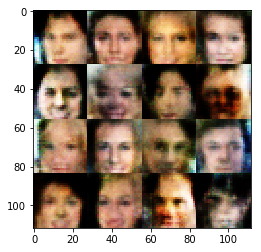

Epoch 1/1... Discriminator Loss: 1.3848... Generator Loss: 2.8778
Epoch 1/1... Discriminator Loss: 0.8211... Generator Loss: 2.9876
Epoch 1/1... Discriminator Loss: 1.1596... Generator Loss: 0.8916
Epoch 1/1... Discriminator Loss: 0.8572... Generator Loss: 1.4279
Epoch 1/1... Discriminator Loss: 0.6130... Generator Loss: 3.3292
Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 0.6288... Generator Loss: 3.4134
Epoch 1/1... Discriminator Loss: 0.6817... Generator Loss: 2.5641
Epoch 1/1... Discriminator Loss: 0.8645... Generator Loss: 3.1794
Epoch 1/1... Discriminator Loss: 0.7288... Generator Loss: 3.3878


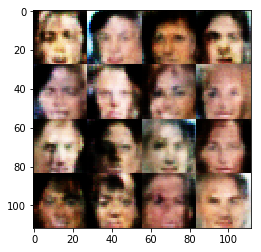

Epoch 1/1... Discriminator Loss: 1.8631... Generator Loss: 1.8590
Epoch 1/1... Discriminator Loss: 0.6310... Generator Loss: 3.2212
Epoch 1/1... Discriminator Loss: 0.7996... Generator Loss: 1.7050
Epoch 1/1... Discriminator Loss: 1.0390... Generator Loss: 1.3576
Epoch 1/1... Discriminator Loss: 0.6423... Generator Loss: 2.8484
Epoch 1/1... Discriminator Loss: 0.7333... Generator Loss: 2.1204
Epoch 1/1... Discriminator Loss: 0.7478... Generator Loss: 1.9010
Epoch 1/1... Discriminator Loss: 0.7089... Generator Loss: 2.2341
Epoch 1/1... Discriminator Loss: 0.6737... Generator Loss: 2.4193
Epoch 1/1... Discriminator Loss: 0.9029... Generator Loss: 1.5165


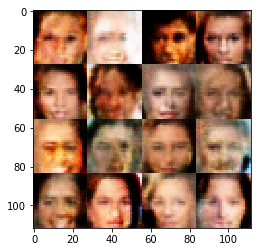

Epoch 1/1... Discriminator Loss: 0.6569... Generator Loss: 3.7552
Epoch 1/1... Discriminator Loss: 0.6578... Generator Loss: 2.4624
Epoch 1/1... Discriminator Loss: 0.6857... Generator Loss: 2.4836
Epoch 1/1... Discriminator Loss: 0.6251... Generator Loss: 3.0530
Epoch 1/1... Discriminator Loss: 0.6315... Generator Loss: 3.7404
Epoch 1/1... Discriminator Loss: 0.6681... Generator Loss: 2.8083
Epoch 1/1... Discriminator Loss: 0.7361... Generator Loss: 2.2765
Epoch 1/1... Discriminator Loss: 0.7057... Generator Loss: 2.6257
Epoch 1/1... Discriminator Loss: 1.2837... Generator Loss: 0.8264
Epoch 1/1... Discriminator Loss: 1.1797... Generator Loss: 2.3303


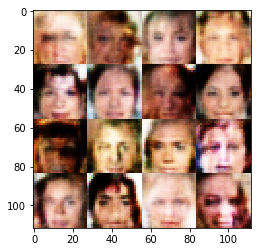

Epoch 1/1... Discriminator Loss: 0.9849... Generator Loss: 2.1426
Epoch 1/1... Discriminator Loss: 0.6092... Generator Loss: 3.2281
Epoch 1/1... Discriminator Loss: 0.6190... Generator Loss: 3.4998
Epoch 1/1... Discriminator Loss: 0.8559... Generator Loss: 1.6127
Epoch 1/1... Discriminator Loss: 0.7928... Generator Loss: 3.6968
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 2.2564
Epoch 1/1... Discriminator Loss: 0.7336... Generator Loss: 1.9828
Epoch 1/1... Discriminator Loss: 0.9807... Generator Loss: 3.6022
Epoch 1/1... Discriminator Loss: 0.6838... Generator Loss: 2.4541
Epoch 1/1... Discriminator Loss: 0.7857... Generator Loss: 1.7466


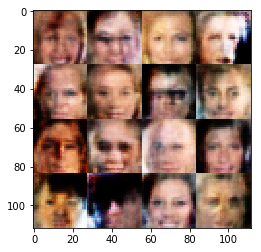

Epoch 1/1... Discriminator Loss: 0.6818... Generator Loss: 2.6627
Epoch 1/1... Discriminator Loss: 1.0312... Generator Loss: 1.0772
Epoch 1/1... Discriminator Loss: 1.6805... Generator Loss: 2.9474
Epoch 1/1... Discriminator Loss: 0.6672... Generator Loss: 2.6038
Epoch 1/1... Discriminator Loss: 0.8374... Generator Loss: 2.5289
Epoch 1/1... Discriminator Loss: 0.6087... Generator Loss: 3.4864
Epoch 1/1... Discriminator Loss: 1.1417... Generator Loss: 0.8868
Epoch 1/1... Discriminator Loss: 0.9378... Generator Loss: 1.3223
Epoch 1/1... Discriminator Loss: 1.0120... Generator Loss: 4.3491
Epoch 1/1... Discriminator Loss: 1.1710... Generator Loss: 0.9402


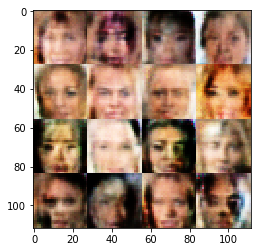

Epoch 1/1... Discriminator Loss: 0.8755... Generator Loss: 1.4503
Epoch 1/1... Discriminator Loss: 0.6792... Generator Loss: 2.4682
Epoch 1/1... Discriminator Loss: 0.8549... Generator Loss: 1.5064
Epoch 1/1... Discriminator Loss: 0.6143... Generator Loss: 3.2007
Epoch 1/1... Discriminator Loss: 1.1599... Generator Loss: 1.5917
Epoch 1/1... Discriminator Loss: 0.6930... Generator Loss: 2.1984
Epoch 1/1... Discriminator Loss: 0.6749... Generator Loss: 2.4316
Epoch 1/1... Discriminator Loss: 0.8706... Generator Loss: 1.4741
Epoch 1/1... Discriminator Loss: 0.6499... Generator Loss: 3.1248
Epoch 1/1... Discriminator Loss: 0.8302... Generator Loss: 1.7583


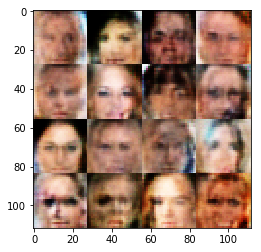

Epoch 1/1... Discriminator Loss: 1.1070... Generator Loss: 3.0389
Epoch 1/1... Discriminator Loss: 1.1686... Generator Loss: 2.1301
Epoch 1/1... Discriminator Loss: 1.3430... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 0.8160... Generator Loss: 1.7378
Epoch 1/1... Discriminator Loss: 2.2386... Generator Loss: 3.4219
Epoch 1/1... Discriminator Loss: 0.7838... Generator Loss: 1.7956
Epoch 1/1... Discriminator Loss: 0.6316... Generator Loss: 3.0453
Epoch 1/1... Discriminator Loss: 1.0773... Generator Loss: 1.3058
Epoch 1/1... Discriminator Loss: 0.6774... Generator Loss: 2.7125
Epoch 1/1... Discriminator Loss: 0.6630... Generator Loss: 2.4605


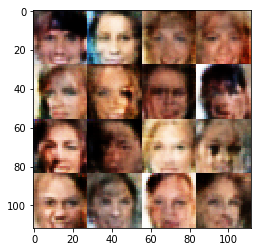

Epoch 1/1... Discriminator Loss: 2.1176... Generator Loss: 0.3199
Epoch 1/1... Discriminator Loss: 0.8051... Generator Loss: 2.5582
Epoch 1/1... Discriminator Loss: 1.1662... Generator Loss: 2.0476
Epoch 1/1... Discriminator Loss: 0.7791... Generator Loss: 1.7047
Epoch 1/1... Discriminator Loss: 0.6098... Generator Loss: 3.2856
Epoch 1/1... Discriminator Loss: 1.0862... Generator Loss: 1.1102
Epoch 1/1... Discriminator Loss: 0.7123... Generator Loss: 2.2394
Epoch 1/1... Discriminator Loss: 0.6595... Generator Loss: 2.9087
Epoch 1/1... Discriminator Loss: 0.9403... Generator Loss: 1.2932
Epoch 1/1... Discriminator Loss: 1.0032... Generator Loss: 2.3340


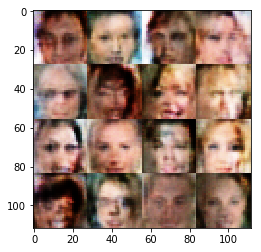

Epoch 1/1... Discriminator Loss: 0.8025... Generator Loss: 3.0493
Epoch 1/1... Discriminator Loss: 2.3197... Generator Loss: 3.6603
Epoch 1/1... Discriminator Loss: 1.0677... Generator Loss: 0.9887
Epoch 1/1... Discriminator Loss: 1.5719... Generator Loss: 3.7929
Epoch 1/1... Discriminator Loss: 1.0083... Generator Loss: 1.3219
Epoch 1/1... Discriminator Loss: 0.7811... Generator Loss: 2.7338
Epoch 1/1... Discriminator Loss: 0.6539... Generator Loss: 2.7821
Epoch 1/1... Discriminator Loss: 0.9669... Generator Loss: 3.3610
Epoch 1/1... Discriminator Loss: 0.7963... Generator Loss: 2.0699
Epoch 1/1... Discriminator Loss: 2.1351... Generator Loss: 2.8295


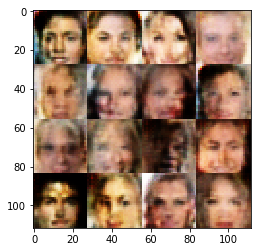

Epoch 1/1... Discriminator Loss: 0.9961... Generator Loss: 1.1346
Epoch 1/1... Discriminator Loss: 1.1884... Generator Loss: 0.9640
Epoch 1/1... Discriminator Loss: 1.4325... Generator Loss: 2.6899
Epoch 1/1... Discriminator Loss: 0.7588... Generator Loss: 1.9759
Epoch 1/1... Discriminator Loss: 0.6852... Generator Loss: 2.3119
Epoch 1/1... Discriminator Loss: 1.1383... Generator Loss: 0.9340
Epoch 1/1... Discriminator Loss: 1.5098... Generator Loss: 3.4044
Epoch 1/1... Discriminator Loss: 0.7446... Generator Loss: 1.9921
Epoch 1/1... Discriminator Loss: 0.6426... Generator Loss: 3.2865
Epoch 1/1... Discriminator Loss: 1.0004... Generator Loss: 1.3138


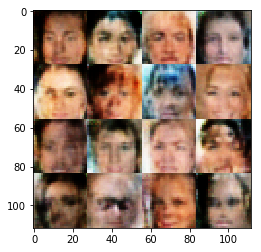

Epoch 1/1... Discriminator Loss: 0.8872... Generator Loss: 2.6440
Epoch 1/1... Discriminator Loss: 0.6561... Generator Loss: 2.9268
Epoch 1/1... Discriminator Loss: 0.7355... Generator Loss: 2.2107
Epoch 1/1... Discriminator Loss: 0.8691... Generator Loss: 2.5112
Epoch 1/1... Discriminator Loss: 0.8488... Generator Loss: 1.5959
Epoch 1/1... Discriminator Loss: 0.9221... Generator Loss: 1.2976
Epoch 1/1... Discriminator Loss: 0.7931... Generator Loss: 1.8038
Epoch 1/1... Discriminator Loss: 0.8071... Generator Loss: 1.7465
Epoch 1/1... Discriminator Loss: 0.9883... Generator Loss: 1.2313
Epoch 1/1... Discriminator Loss: 2.0123... Generator Loss: 0.3247


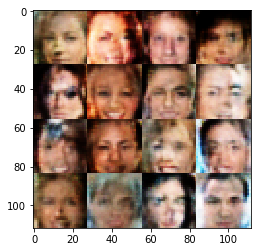

Epoch 1/1... Discriminator Loss: 0.9385... Generator Loss: 1.2631
Epoch 1/1... Discriminator Loss: 1.3914... Generator Loss: 2.5916
Epoch 1/1... Discriminator Loss: 0.9112... Generator Loss: 2.0865
Epoch 1/1... Discriminator Loss: 0.7385... Generator Loss: 2.3829
Epoch 1/1... Discriminator Loss: 0.9768... Generator Loss: 1.2753
Epoch 1/1... Discriminator Loss: 0.9233... Generator Loss: 1.7876
Epoch 1/1... Discriminator Loss: 0.8779... Generator Loss: 1.6301
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.6952
Epoch 1/1... Discriminator Loss: 0.7991... Generator Loss: 1.8848
Epoch 1/1... Discriminator Loss: 0.8212... Generator Loss: 2.6753


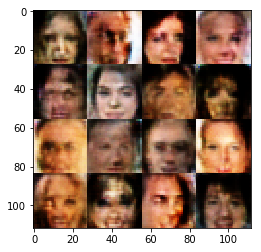

Epoch 1/1... Discriminator Loss: 0.9670... Generator Loss: 1.2914
Epoch 1/1... Discriminator Loss: 0.8340... Generator Loss: 1.6590
Epoch 1/1... Discriminator Loss: 1.3067... Generator Loss: 0.7706
Epoch 1/1... Discriminator Loss: 0.8193... Generator Loss: 3.7316
Epoch 1/1... Discriminator Loss: 1.1326... Generator Loss: 0.9407
Epoch 1/1... Discriminator Loss: 1.1715... Generator Loss: 2.2957
Epoch 1/1... Discriminator Loss: 0.7049... Generator Loss: 2.1395
Epoch 1/1... Discriminator Loss: 1.2869... Generator Loss: 0.7357
Epoch 1/1... Discriminator Loss: 1.1074... Generator Loss: 0.9286
Epoch 1/1... Discriminator Loss: 0.9599... Generator Loss: 1.3139


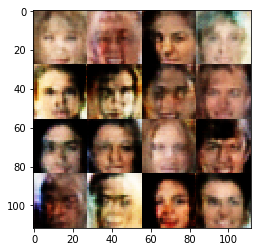

Epoch 1/1... Discriminator Loss: 0.7522... Generator Loss: 2.4968
Epoch 1/1... Discriminator Loss: 1.4979... Generator Loss: 0.5796
Epoch 1/1... Discriminator Loss: 1.0187... Generator Loss: 1.0768
Epoch 1/1... Discriminator Loss: 0.9470... Generator Loss: 2.1087
Epoch 1/1... Discriminator Loss: 0.6755... Generator Loss: 3.4127
Epoch 1/1... Discriminator Loss: 0.6735... Generator Loss: 2.5995
Epoch 1/1... Discriminator Loss: 1.2320... Generator Loss: 2.8035
Epoch 1/1... Discriminator Loss: 1.5648... Generator Loss: 3.3394
Epoch 1/1... Discriminator Loss: 1.0038... Generator Loss: 1.5905
Epoch 1/1... Discriminator Loss: 0.7412... Generator Loss: 3.2328


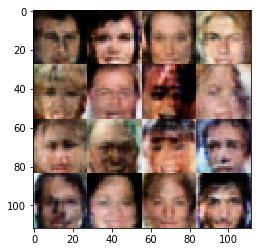

Epoch 1/1... Discriminator Loss: 1.2259... Generator Loss: 0.9263
Epoch 1/1... Discriminator Loss: 1.0854... Generator Loss: 1.4962
Epoch 1/1... Discriminator Loss: 0.9187... Generator Loss: 1.2731
Epoch 1/1... Discriminator Loss: 0.9234... Generator Loss: 2.3396
Epoch 1/1... Discriminator Loss: 1.0409... Generator Loss: 1.1130
Epoch 1/1... Discriminator Loss: 0.7965... Generator Loss: 1.7827
Epoch 1/1... Discriminator Loss: 0.7150... Generator Loss: 2.1074
Epoch 1/1... Discriminator Loss: 0.8327... Generator Loss: 1.5549
Epoch 1/1... Discriminator Loss: 0.7163... Generator Loss: 2.1195
Epoch 1/1... Discriminator Loss: 0.9717... Generator Loss: 1.2735


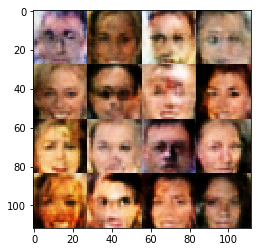

Epoch 1/1... Discriminator Loss: 1.1188... Generator Loss: 1.0695
Epoch 1/1... Discriminator Loss: 1.1634... Generator Loss: 0.8624
Epoch 1/1... Discriminator Loss: 0.7883... Generator Loss: 2.1962
Epoch 1/1... Discriminator Loss: 2.7713... Generator Loss: 3.8046
Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 0.6501
Epoch 1/1... Discriminator Loss: 0.7898... Generator Loss: 1.7089
Epoch 1/1... Discriminator Loss: 0.8566... Generator Loss: 1.6358
Epoch 1/1... Discriminator Loss: 0.9554... Generator Loss: 1.2279
Epoch 1/1... Discriminator Loss: 0.6403... Generator Loss: 2.8729
Epoch 1/1... Discriminator Loss: 1.0467... Generator Loss: 1.0310


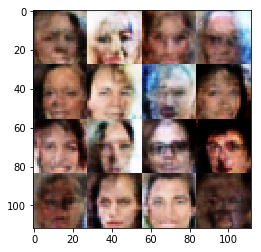

Epoch 1/1... Discriminator Loss: 0.6489... Generator Loss: 2.9439
Epoch 1/1... Discriminator Loss: 1.4456... Generator Loss: 2.1408
Epoch 1/1... Discriminator Loss: 0.8015... Generator Loss: 1.6534
Epoch 1/1... Discriminator Loss: 1.6689... Generator Loss: 3.1496
Epoch 1/1... Discriminator Loss: 0.8514... Generator Loss: 1.4946
Epoch 1/1... Discriminator Loss: 1.0557... Generator Loss: 3.5761
Epoch 1/1... Discriminator Loss: 1.1377... Generator Loss: 1.0010
Epoch 1/1... Discriminator Loss: 0.9977... Generator Loss: 1.1534
Epoch 1/1... Discriminator Loss: 1.0408... Generator Loss: 1.4505
Epoch 1/1... Discriminator Loss: 0.8153... Generator Loss: 1.8273


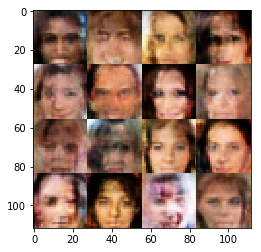

Epoch 1/1... Discriminator Loss: 0.6439... Generator Loss: 2.7186
Epoch 1/1... Discriminator Loss: 2.0292... Generator Loss: 0.3180
Epoch 1/1... Discriminator Loss: 0.7786... Generator Loss: 1.7444
Epoch 1/1... Discriminator Loss: 1.4929... Generator Loss: 3.1709
Epoch 1/1... Discriminator Loss: 1.4963... Generator Loss: 0.6029
Epoch 1/1... Discriminator Loss: 1.1895... Generator Loss: 0.8472
Epoch 1/1... Discriminator Loss: 0.8808... Generator Loss: 1.5652
Epoch 1/1... Discriminator Loss: 0.8260... Generator Loss: 2.7353
Epoch 1/1... Discriminator Loss: 0.7896... Generator Loss: 1.8069
Epoch 1/1... Discriminator Loss: 0.8819... Generator Loss: 1.6663


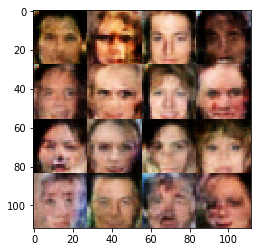

Epoch 1/1... Discriminator Loss: 0.7664... Generator Loss: 2.0474
Epoch 1/1... Discriminator Loss: 0.6629... Generator Loss: 2.6240
Epoch 1/1... Discriminator Loss: 0.8599... Generator Loss: 2.0138
Epoch 1/1... Discriminator Loss: 0.9549... Generator Loss: 1.2315
Epoch 1/1... Discriminator Loss: 0.9248... Generator Loss: 1.2868
Epoch 1/1... Discriminator Loss: 0.7387... Generator Loss: 2.4726
Epoch 1/1... Discriminator Loss: 0.8680... Generator Loss: 1.5077
Epoch 1/1... Discriminator Loss: 0.9046... Generator Loss: 2.1071
Epoch 1/1... Discriminator Loss: 0.8883... Generator Loss: 1.8455
Epoch 1/1... Discriminator Loss: 0.8279... Generator Loss: 2.0531


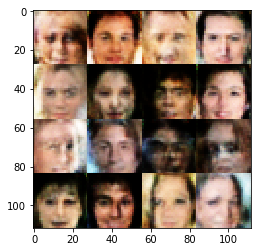

Epoch 1/1... Discriminator Loss: 1.0846... Generator Loss: 1.6863
Epoch 1/1... Discriminator Loss: 2.0208... Generator Loss: 0.3228
Epoch 1/1... Discriminator Loss: 1.2224... Generator Loss: 0.7976
Epoch 1/1... Discriminator Loss: 1.0751... Generator Loss: 0.9921
Epoch 1/1... Discriminator Loss: 0.8281... Generator Loss: 2.8766
Epoch 1/1... Discriminator Loss: 1.7326... Generator Loss: 0.4817
Epoch 1/1... Discriminator Loss: 1.5261... Generator Loss: 0.5245
Epoch 1/1... Discriminator Loss: 1.3285... Generator Loss: 0.8359
Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 0.7990
Epoch 1/1... Discriminator Loss: 0.6026... Generator Loss: 3.6842


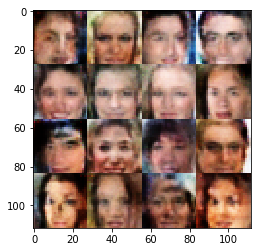

Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 0.7741
Epoch 1/1... Discriminator Loss: 0.6845... Generator Loss: 4.0209
Epoch 1/1... Discriminator Loss: 0.7814... Generator Loss: 1.8509
Epoch 1/1... Discriminator Loss: 0.8277... Generator Loss: 2.2650
Epoch 1/1... Discriminator Loss: 0.9352... Generator Loss: 1.2476
Epoch 1/1... Discriminator Loss: 0.7557... Generator Loss: 1.8781
Epoch 1/1... Discriminator Loss: 0.7041... Generator Loss: 2.1946
Epoch 1/1... Discriminator Loss: 0.7267... Generator Loss: 2.2507
Epoch 1/1... Discriminator Loss: 1.3776... Generator Loss: 0.6984
Epoch 1/1... Discriminator Loss: 0.7200... Generator Loss: 2.0765


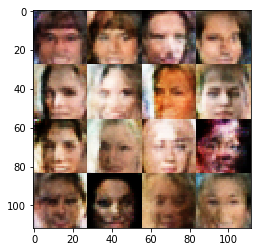

Epoch 1/1... Discriminator Loss: 1.0001... Generator Loss: 1.4794
Epoch 1/1... Discriminator Loss: 0.9706... Generator Loss: 1.3733
Epoch 1/1... Discriminator Loss: 0.6624... Generator Loss: 2.9115
Epoch 1/1... Discriminator Loss: 0.7446... Generator Loss: 2.1549
Epoch 1/1... Discriminator Loss: 0.8460... Generator Loss: 1.5882
Epoch 1/1... Discriminator Loss: 0.7585... Generator Loss: 2.1154
Epoch 1/1... Discriminator Loss: 0.9886... Generator Loss: 1.2343
Epoch 1/1... Discriminator Loss: 0.8508... Generator Loss: 1.9010
Epoch 1/1... Discriminator Loss: 0.8764... Generator Loss: 1.4916
Epoch 1/1... Discriminator Loss: 0.9443... Generator Loss: 1.2202


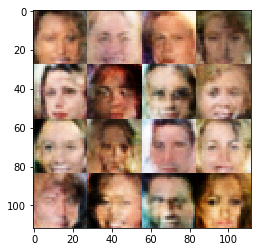

Epoch 1/1... Discriminator Loss: 0.8778... Generator Loss: 2.8675
Epoch 1/1... Discriminator Loss: 1.0230... Generator Loss: 1.7257
Epoch 1/1... Discriminator Loss: 0.8270... Generator Loss: 1.5931
Epoch 1/1... Discriminator Loss: 0.8920... Generator Loss: 1.3855
Epoch 1/1... Discriminator Loss: 1.6617... Generator Loss: 0.5043
Epoch 1/1... Discriminator Loss: 0.9755... Generator Loss: 1.3515
Epoch 1/1... Discriminator Loss: 0.9682... Generator Loss: 1.2428
Epoch 1/1... Discriminator Loss: 2.5147... Generator Loss: 3.1538
Epoch 1/1... Discriminator Loss: 0.8016... Generator Loss: 1.7668
Epoch 1/1... Discriminator Loss: 0.9565... Generator Loss: 1.2770


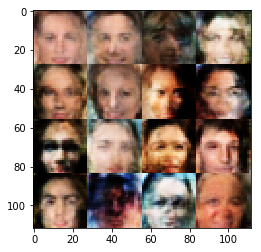

Epoch 1/1... Discriminator Loss: 1.1606... Generator Loss: 1.0322
Epoch 1/1... Discriminator Loss: 1.2915... Generator Loss: 1.6955
Epoch 1/1... Discriminator Loss: 0.8160... Generator Loss: 1.6245
Epoch 1/1... Discriminator Loss: 1.1722... Generator Loss: 0.8380
Epoch 1/1... Discriminator Loss: 1.2113... Generator Loss: 0.8670
Epoch 1/1... Discriminator Loss: 0.7583... Generator Loss: 2.0550
Epoch 1/1... Discriminator Loss: 1.3563... Generator Loss: 2.9791
Epoch 1/1... Discriminator Loss: 1.5261... Generator Loss: 2.2517
Epoch 1/1... Discriminator Loss: 0.8007... Generator Loss: 1.7084
Epoch 1/1... Discriminator Loss: 1.2870... Generator Loss: 0.7782


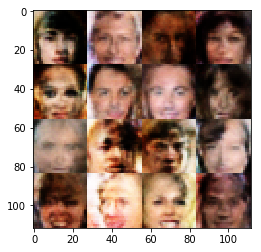

Epoch 1/1... Discriminator Loss: 0.8219... Generator Loss: 1.6139
Epoch 1/1... Discriminator Loss: 1.7071... Generator Loss: 2.8554
Epoch 1/1... Discriminator Loss: 0.7368... Generator Loss: 2.0613
Epoch 1/1... Discriminator Loss: 1.2684... Generator Loss: 0.8222
Epoch 1/1... Discriminator Loss: 1.4273... Generator Loss: 0.6244
Epoch 1/1... Discriminator Loss: 0.6782... Generator Loss: 2.5089
Epoch 1/1... Discriminator Loss: 1.4190... Generator Loss: 0.6951
Epoch 1/1... Discriminator Loss: 0.6598... Generator Loss: 3.0392
Epoch 1/1... Discriminator Loss: 1.0858... Generator Loss: 1.0223
Epoch 1/1... Discriminator Loss: 1.5144... Generator Loss: 0.5408


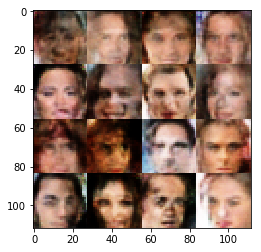

Epoch 1/1... Discriminator Loss: 0.8052... Generator Loss: 1.6733
Epoch 1/1... Discriminator Loss: 1.2342... Generator Loss: 3.2219
Epoch 1/1... Discriminator Loss: 0.7497... Generator Loss: 1.8385
Epoch 1/1... Discriminator Loss: 1.0887... Generator Loss: 1.1680
Epoch 1/1... Discriminator Loss: 1.0212... Generator Loss: 3.4142
Epoch 1/1... Discriminator Loss: 0.8574... Generator Loss: 1.5012
Epoch 1/1... Discriminator Loss: 1.0954... Generator Loss: 1.0083
Epoch 1/1... Discriminator Loss: 1.2698... Generator Loss: 4.2965
Epoch 1/1... Discriminator Loss: 1.0344... Generator Loss: 1.2495
Epoch 1/1... Discriminator Loss: 0.6569... Generator Loss: 3.3165


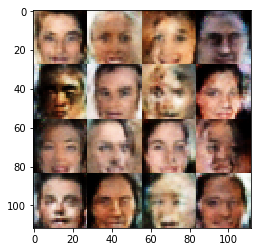

Epoch 1/1... Discriminator Loss: 1.3200... Generator Loss: 0.7486
Epoch 1/1... Discriminator Loss: 0.7139... Generator Loss: 2.4187
Epoch 1/1... Discriminator Loss: 0.7582... Generator Loss: 2.2924
Epoch 1/1... Discriminator Loss: 0.8525... Generator Loss: 1.6578
Epoch 1/1... Discriminator Loss: 0.7662... Generator Loss: 1.8055
Epoch 1/1... Discriminator Loss: 0.8821... Generator Loss: 2.7246
Epoch 1/1... Discriminator Loss: 0.8638... Generator Loss: 1.9824
Epoch 1/1... Discriminator Loss: 1.1013... Generator Loss: 1.1681
Epoch 1/1... Discriminator Loss: 0.7500... Generator Loss: 2.1691
Epoch 1/1... Discriminator Loss: 0.7895... Generator Loss: 2.3143


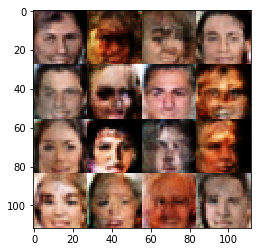

Epoch 1/1... Discriminator Loss: 0.6258... Generator Loss: 3.0133
Epoch 1/1... Discriminator Loss: 1.1224... Generator Loss: 2.0017
Epoch 1/1... Discriminator Loss: 1.1028... Generator Loss: 0.9589
Epoch 1/1... Discriminator Loss: 1.1237... Generator Loss: 1.0517
Epoch 1/1... Discriminator Loss: 0.9416... Generator Loss: 1.2335
Epoch 1/1... Discriminator Loss: 0.8535... Generator Loss: 1.7520
Epoch 1/1... Discriminator Loss: 1.5458... Generator Loss: 2.2957
Epoch 1/1... Discriminator Loss: 1.1536... Generator Loss: 2.4229
Epoch 1/1... Discriminator Loss: 0.9367... Generator Loss: 1.4778
Epoch 1/1... Discriminator Loss: 0.9678... Generator Loss: 1.7081


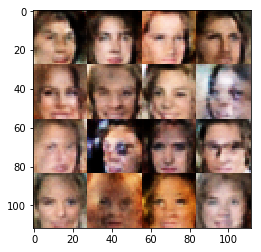

Epoch 1/1... Discriminator Loss: 1.0087... Generator Loss: 1.1084
Epoch 1/1... Discriminator Loss: 0.7186... Generator Loss: 2.7870
Epoch 1/1... Discriminator Loss: 1.0801... Generator Loss: 1.0321
Epoch 1/1... Discriminator Loss: 1.0460... Generator Loss: 1.3861
Epoch 1/1... Discriminator Loss: 0.7331... Generator Loss: 2.4819
Epoch 1/1... Discriminator Loss: 1.0134... Generator Loss: 1.2337
Epoch 1/1... Discriminator Loss: 1.2413... Generator Loss: 0.8146
Epoch 1/1... Discriminator Loss: 0.8273... Generator Loss: 1.8369
Epoch 1/1... Discriminator Loss: 0.6841... Generator Loss: 2.8503
Epoch 1/1... Discriminator Loss: 0.8083... Generator Loss: 1.7384


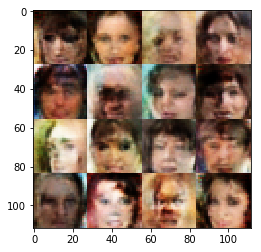

Epoch 1/1... Discriminator Loss: 0.7128... Generator Loss: 2.1510
Epoch 1/1... Discriminator Loss: 0.8151... Generator Loss: 1.6188
Epoch 1/1... Discriminator Loss: 0.8136... Generator Loss: 1.7449
Epoch 1/1... Discriminator Loss: 1.0292... Generator Loss: 1.1468
Epoch 1/1... Discriminator Loss: 0.7349... Generator Loss: 2.2994
Epoch 1/1... Discriminator Loss: 0.6986... Generator Loss: 2.7058
Epoch 1/1... Discriminator Loss: 0.8703... Generator Loss: 2.0798
Epoch 1/1... Discriminator Loss: 1.1874... Generator Loss: 1.7089
Epoch 1/1... Discriminator Loss: 1.2771... Generator Loss: 0.7322
Epoch 1/1... Discriminator Loss: 1.1504... Generator Loss: 1.7173


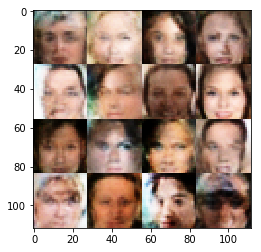

Epoch 1/1... Discriminator Loss: 0.7218... Generator Loss: 2.0311
Epoch 1/1... Discriminator Loss: 1.2877... Generator Loss: 0.7549
Epoch 1/1... Discriminator Loss: 0.7170... Generator Loss: 2.1852
Epoch 1/1... Discriminator Loss: 2.6172... Generator Loss: 3.0882
Epoch 1/1... Discriminator Loss: 0.8324... Generator Loss: 1.6587
Epoch 1/1... Discriminator Loss: 1.0091... Generator Loss: 1.1074
Epoch 1/1... Discriminator Loss: 1.7338... Generator Loss: 0.4478
Epoch 1/1... Discriminator Loss: 0.7723... Generator Loss: 1.9983
Epoch 1/1... Discriminator Loss: 0.7041... Generator Loss: 3.2114
Epoch 1/1... Discriminator Loss: 1.0983... Generator Loss: 2.3663


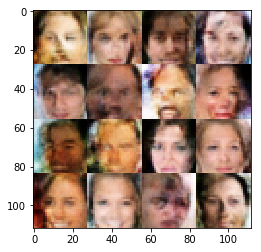

Epoch 1/1... Discriminator Loss: 1.0957... Generator Loss: 2.5658
Epoch 1/1... Discriminator Loss: 0.8005... Generator Loss: 3.1741
Epoch 1/1... Discriminator Loss: 0.9023... Generator Loss: 2.5236
Epoch 1/1... Discriminator Loss: 1.5340... Generator Loss: 0.5240
Epoch 1/1... Discriminator Loss: 0.8333... Generator Loss: 1.5525
Epoch 1/1... Discriminator Loss: 1.0328... Generator Loss: 2.2369
Epoch 1/1... Discriminator Loss: 0.8050... Generator Loss: 1.7263
Epoch 1/1... Discriminator Loss: 1.0003... Generator Loss: 1.2809
Epoch 1/1... Discriminator Loss: 0.9624... Generator Loss: 1.2113
Epoch 1/1... Discriminator Loss: 1.7461... Generator Loss: 0.4860


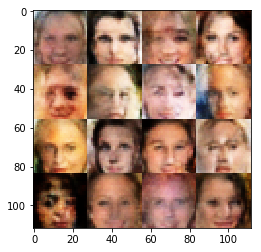

Epoch 1/1... Discriminator Loss: 0.7721... Generator Loss: 2.8285
Epoch 1/1... Discriminator Loss: 0.9747... Generator Loss: 1.2286
Epoch 1/1... Discriminator Loss: 0.9549... Generator Loss: 1.4337
Epoch 1/1... Discriminator Loss: 0.6517... Generator Loss: 2.8110
Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 2.0081
Epoch 1/1... Discriminator Loss: 0.7187... Generator Loss: 3.3415
Epoch 1/1... Discriminator Loss: 1.2067... Generator Loss: 0.8025
Epoch 1/1... Discriminator Loss: 1.3036... Generator Loss: 0.7106
Epoch 1/1... Discriminator Loss: 0.9505... Generator Loss: 1.2249
Epoch 1/1... Discriminator Loss: 1.1670... Generator Loss: 0.8698


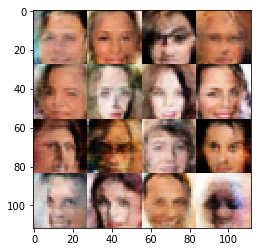

Epoch 1/1... Discriminator Loss: 1.3702... Generator Loss: 0.6602
Epoch 1/1... Discriminator Loss: 1.4852... Generator Loss: 0.6107
Epoch 1/1... Discriminator Loss: 0.9227... Generator Loss: 1.8701
Epoch 1/1... Discriminator Loss: 1.6130... Generator Loss: 0.5349
Epoch 1/1... Discriminator Loss: 0.8160... Generator Loss: 1.6098
Epoch 1/1... Discriminator Loss: 0.7928... Generator Loss: 3.8101
Epoch 1/1... Discriminator Loss: 1.0416... Generator Loss: 1.1764
Epoch 1/1... Discriminator Loss: 0.8939... Generator Loss: 1.7141
Epoch 1/1... Discriminator Loss: 0.7099... Generator Loss: 2.1790
Epoch 1/1... Discriminator Loss: 0.7553... Generator Loss: 1.8469


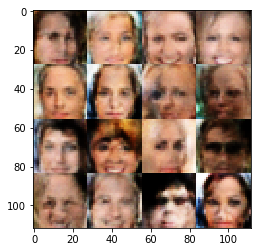

Epoch 1/1... Discriminator Loss: 1.5399... Generator Loss: 0.6505
Epoch 1/1... Discriminator Loss: 0.9615... Generator Loss: 1.2664
Epoch 1/1... Discriminator Loss: 0.8691... Generator Loss: 1.5253
Epoch 1/1... Discriminator Loss: 0.8210... Generator Loss: 2.5199
Epoch 1/1... Discriminator Loss: 1.0645... Generator Loss: 2.4374
Epoch 1/1... Discriminator Loss: 1.1382... Generator Loss: 1.0391
Epoch 1/1... Discriminator Loss: 1.5284... Generator Loss: 0.6296
Epoch 1/1... Discriminator Loss: 1.1710... Generator Loss: 0.8177
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 2.2769
Epoch 1/1... Discriminator Loss: 0.9129... Generator Loss: 1.5833


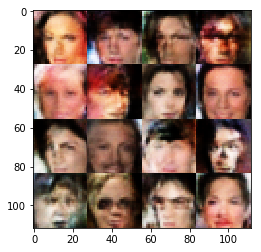

Epoch 1/1... Discriminator Loss: 1.2280... Generator Loss: 0.8409
Epoch 1/1... Discriminator Loss: 0.8815... Generator Loss: 1.5686
Epoch 1/1... Discriminator Loss: 1.3905... Generator Loss: 0.6471
Epoch 1/1... Discriminator Loss: 1.1340... Generator Loss: 0.9265
Epoch 1/1... Discriminator Loss: 1.1077... Generator Loss: 1.0827
Epoch 1/1... Discriminator Loss: 1.0684... Generator Loss: 1.3901
Epoch 1/1... Discriminator Loss: 1.7456... Generator Loss: 0.4708
Epoch 1/1... Discriminator Loss: 1.2260... Generator Loss: 0.7784
Epoch 1/1... Discriminator Loss: 1.0667... Generator Loss: 1.0532
Epoch 1/1... Discriminator Loss: 1.1864... Generator Loss: 0.8721


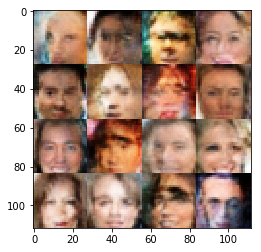

Epoch 1/1... Discriminator Loss: 0.8483... Generator Loss: 1.5477
Epoch 1/1... Discriminator Loss: 0.6619... Generator Loss: 2.9475
Epoch 1/1... Discriminator Loss: 1.1088... Generator Loss: 0.9963
Epoch 1/1... Discriminator Loss: 0.9371... Generator Loss: 1.2784
Epoch 1/1... Discriminator Loss: 1.0187... Generator Loss: 1.7560
Epoch 1/1... Discriminator Loss: 1.0560... Generator Loss: 1.0817
Epoch 1/1... Discriminator Loss: 1.3245... Generator Loss: 0.8103
Epoch 1/1... Discriminator Loss: 0.6753... Generator Loss: 2.8258
Epoch 1/1... Discriminator Loss: 0.7970... Generator Loss: 1.7334
Epoch 1/1... Discriminator Loss: 0.8313... Generator Loss: 3.1216


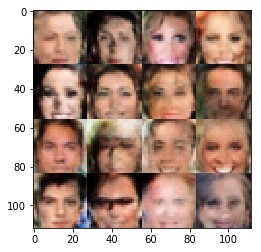

Epoch 1/1... Discriminator Loss: 1.1356... Generator Loss: 0.8958
Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.6980
Epoch 1/1... Discriminator Loss: 1.0329... Generator Loss: 1.4232
Epoch 1/1... Discriminator Loss: 1.2683... Generator Loss: 2.5239
Epoch 1/1... Discriminator Loss: 1.0540... Generator Loss: 1.0923
Epoch 1/1... Discriminator Loss: 0.9261... Generator Loss: 1.2725
Epoch 1/1... Discriminator Loss: 1.1103... Generator Loss: 0.9362
Epoch 1/1... Discriminator Loss: 0.6918... Generator Loss: 2.2833
Epoch 1/1... Discriminator Loss: 0.9045... Generator Loss: 1.3718
Epoch 1/1... Discriminator Loss: 0.7485... Generator Loss: 2.1708


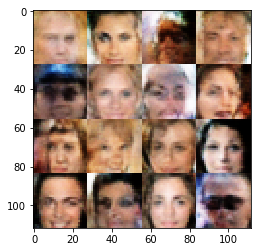

Epoch 1/1... Discriminator Loss: 2.0553... Generator Loss: 0.3258
Epoch 1/1... Discriminator Loss: 0.6810... Generator Loss: 2.6584
Epoch 1/1... Discriminator Loss: 0.8533... Generator Loss: 1.6615
Epoch 1/1... Discriminator Loss: 0.9393... Generator Loss: 1.7211
Epoch 1/1... Discriminator Loss: 0.7091... Generator Loss: 2.5717
Epoch 1/1... Discriminator Loss: 1.0816... Generator Loss: 0.9747
Epoch 1/1... Discriminator Loss: 1.0112... Generator Loss: 1.2221
Epoch 1/1... Discriminator Loss: 0.9040... Generator Loss: 1.3473
Epoch 1/1... Discriminator Loss: 1.0364... Generator Loss: 1.1125
Epoch 1/1... Discriminator Loss: 1.0457... Generator Loss: 1.0814


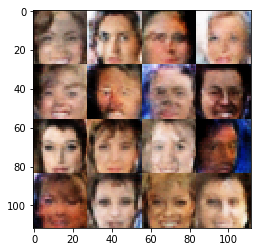

Epoch 1/1... Discriminator Loss: 1.1354... Generator Loss: 0.9537
Epoch 1/1... Discriminator Loss: 0.9514... Generator Loss: 1.3194
Epoch 1/1... Discriminator Loss: 1.2055... Generator Loss: 1.1428
Epoch 1/1... Discriminator Loss: 1.1860... Generator Loss: 1.7208
Epoch 1/1... Discriminator Loss: 1.7602... Generator Loss: 0.4058
Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.6461
Epoch 1/1... Discriminator Loss: 0.9560... Generator Loss: 1.2639
Epoch 1/1... Discriminator Loss: 1.4844... Generator Loss: 0.5658
Epoch 1/1... Discriminator Loss: 1.1275... Generator Loss: 2.3245
Epoch 1/1... Discriminator Loss: 0.6543... Generator Loss: 2.5211


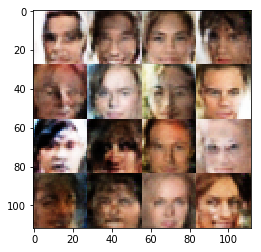

Epoch 1/1... Discriminator Loss: 1.0859... Generator Loss: 0.9484
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 1.9259
Epoch 1/1... Discriminator Loss: 1.0254... Generator Loss: 1.1453
Epoch 1/1... Discriminator Loss: 0.6514... Generator Loss: 2.8676
Epoch 1/1... Discriminator Loss: 1.2784... Generator Loss: 0.7260
Epoch 1/1... Discriminator Loss: 1.4456... Generator Loss: 0.5771
Epoch 1/1... Discriminator Loss: 0.9158... Generator Loss: 1.3280
Epoch 1/1... Discriminator Loss: 1.0589... Generator Loss: 1.5944
Epoch 1/1... Discriminator Loss: 0.7712... Generator Loss: 2.0002
Epoch 1/1... Discriminator Loss: 1.4628... Generator Loss: 0.5598


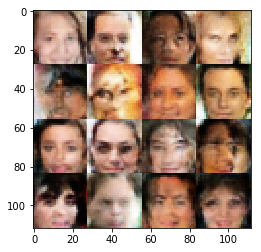

Epoch 1/1... Discriminator Loss: 0.7797... Generator Loss: 1.7980
Epoch 1/1... Discriminator Loss: 0.6823... Generator Loss: 2.9638
Epoch 1/1... Discriminator Loss: 1.3811... Generator Loss: 2.0142
Epoch 1/1... Discriminator Loss: 0.7875... Generator Loss: 1.9177
Epoch 1/1... Discriminator Loss: 0.7828... Generator Loss: 1.8733
Epoch 1/1... Discriminator Loss: 1.1393... Generator Loss: 1.9258
Epoch 1/1... Discriminator Loss: 1.0781... Generator Loss: 1.0941
Epoch 1/1... Discriminator Loss: 1.3400... Generator Loss: 0.6985
Epoch 1/1... Discriminator Loss: 0.8507... Generator Loss: 2.3699
Epoch 1/1... Discriminator Loss: 0.9926... Generator Loss: 1.1986


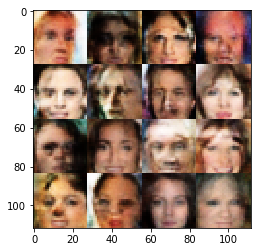

Epoch 1/1... Discriminator Loss: 1.8411... Generator Loss: 3.0340
Epoch 1/1... Discriminator Loss: 0.8805... Generator Loss: 1.3883
Epoch 1/1... Discriminator Loss: 0.9401... Generator Loss: 1.3931
Epoch 1/1... Discriminator Loss: 0.6029... Generator Loss: 4.4907
Epoch 1/1... Discriminator Loss: 1.3505... Generator Loss: 0.6850
Epoch 1/1... Discriminator Loss: 0.7715... Generator Loss: 1.8727
Epoch 1/1... Discriminator Loss: 1.8821... Generator Loss: 0.3713
Epoch 1/1... Discriminator Loss: 1.1137... Generator Loss: 1.0801
Epoch 1/1... Discriminator Loss: 1.1672... Generator Loss: 0.8790
Epoch 1/1... Discriminator Loss: 1.8505... Generator Loss: 0.3789


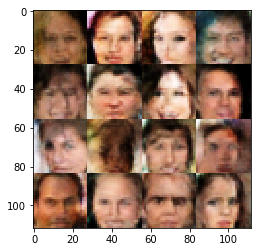

Epoch 1/1... Discriminator Loss: 1.0144... Generator Loss: 1.2902
Epoch 1/1... Discriminator Loss: 1.4743... Generator Loss: 0.6610
Epoch 1/1... Discriminator Loss: 0.9500... Generator Loss: 1.6292
Epoch 1/1... Discriminator Loss: 0.9382... Generator Loss: 1.3327
Epoch 1/1... Discriminator Loss: 1.0202... Generator Loss: 1.1485
Epoch 1/1... Discriminator Loss: 0.6732... Generator Loss: 2.4918
Epoch 1/1... Discriminator Loss: 1.1479... Generator Loss: 1.3554
Epoch 1/1... Discriminator Loss: 0.8983... Generator Loss: 1.3316
Epoch 1/1... Discriminator Loss: 0.7283... Generator Loss: 2.4562
Epoch 1/1... Discriminator Loss: 0.6994... Generator Loss: 2.1797


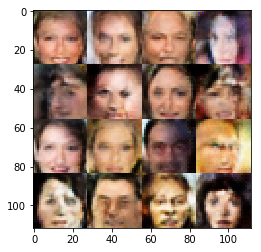

Epoch 1/1... Discriminator Loss: 1.0048... Generator Loss: 1.4564
Epoch 1/1... Discriminator Loss: 0.8938... Generator Loss: 1.4267
Epoch 1/1... Discriminator Loss: 0.7648... Generator Loss: 2.2922
Epoch 1/1... Discriminator Loss: 0.7688... Generator Loss: 1.9271
Epoch 1/1... Discriminator Loss: 1.4630... Generator Loss: 2.3463
Epoch 1/1... Discriminator Loss: 1.5189... Generator Loss: 0.5243
Epoch 1/1... Discriminator Loss: 1.0541... Generator Loss: 0.9991
Epoch 1/1... Discriminator Loss: 1.1171... Generator Loss: 0.9895
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.6678
Epoch 1/1... Discriminator Loss: 1.0742... Generator Loss: 0.9623


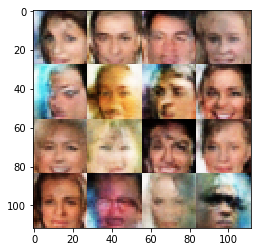

Epoch 1/1... Discriminator Loss: 1.4685... Generator Loss: 0.5447
Epoch 1/1... Discriminator Loss: 0.7516... Generator Loss: 1.9013
Epoch 1/1... Discriminator Loss: 1.2701... Generator Loss: 2.8167
Epoch 1/1... Discriminator Loss: 0.7542... Generator Loss: 1.9126
Epoch 1/1... Discriminator Loss: 1.2153... Generator Loss: 1.0775
Epoch 1/1... Discriminator Loss: 1.0821... Generator Loss: 1.2142
Epoch 1/1... Discriminator Loss: 1.6622... Generator Loss: 2.5211
Epoch 1/1... Discriminator Loss: 0.9471... Generator Loss: 1.2406
Epoch 1/1... Discriminator Loss: 0.8566... Generator Loss: 1.5013
Epoch 1/1... Discriminator Loss: 0.6646... Generator Loss: 2.7580


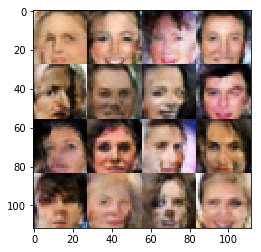

Epoch 1/1... Discriminator Loss: 0.9550... Generator Loss: 1.3591
Epoch 1/1... Discriminator Loss: 0.8394... Generator Loss: 2.4186
Epoch 1/1... Discriminator Loss: 1.1149... Generator Loss: 1.3935
Epoch 1/1... Discriminator Loss: 0.9281... Generator Loss: 2.0166
Epoch 1/1... Discriminator Loss: 0.6469... Generator Loss: 2.6363
Epoch 1/1... Discriminator Loss: 0.8937... Generator Loss: 1.6708
Epoch 1/1... Discriminator Loss: 1.2617... Generator Loss: 1.6396
Epoch 1/1... Discriminator Loss: 1.0603... Generator Loss: 1.0171
Epoch 1/1... Discriminator Loss: 0.6426... Generator Loss: 2.7282
Epoch 1/1... Discriminator Loss: 0.7039... Generator Loss: 2.1757


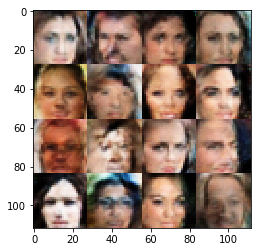

Epoch 1/1... Discriminator Loss: 1.1017... Generator Loss: 1.3074
Epoch 1/1... Discriminator Loss: 1.5221... Generator Loss: 0.5465
Epoch 1/1... Discriminator Loss: 1.7089... Generator Loss: 0.5012
Epoch 1/1... Discriminator Loss: 1.5536... Generator Loss: 0.5645
Epoch 1/1... Discriminator Loss: 1.1131... Generator Loss: 0.9471
Epoch 1/1... Discriminator Loss: 0.9206... Generator Loss: 1.3538
Epoch 1/1... Discriminator Loss: 0.8035... Generator Loss: 1.9689
Epoch 1/1... Discriminator Loss: 0.6478... Generator Loss: 2.9245
Epoch 1/1... Discriminator Loss: 1.4104... Generator Loss: 0.6093
Epoch 1/1... Discriminator Loss: 1.2386... Generator Loss: 2.1027


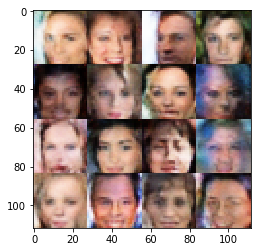

Epoch 1/1... Discriminator Loss: 0.8503... Generator Loss: 1.5094
Epoch 1/1... Discriminator Loss: 1.2932... Generator Loss: 2.5582
Epoch 1/1... Discriminator Loss: 0.9751... Generator Loss: 1.1714
Epoch 1/1... Discriminator Loss: 1.2594... Generator Loss: 0.8215
Epoch 1/1... Discriminator Loss: 1.1157... Generator Loss: 0.9772
Epoch 1/1... Discriminator Loss: 1.1193... Generator Loss: 2.8029
Epoch 1/1... Discriminator Loss: 0.9080... Generator Loss: 1.4908
Epoch 1/1... Discriminator Loss: 1.2005... Generator Loss: 0.8427
Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 1.7605
Epoch 1/1... Discriminator Loss: 1.0876... Generator Loss: 0.9944


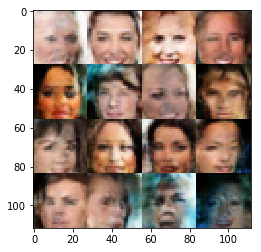

Epoch 1/1... Discriminator Loss: 0.8235... Generator Loss: 1.9916
Epoch 1/1... Discriminator Loss: 1.1727... Generator Loss: 2.5815
Epoch 1/1... Discriminator Loss: 0.8459... Generator Loss: 1.5189
Epoch 1/1... Discriminator Loss: 1.1184... Generator Loss: 0.9166
Epoch 1/1... Discriminator Loss: 0.8900... Generator Loss: 1.5969
Epoch 1/1... Discriminator Loss: 1.3043... Generator Loss: 0.7157
Epoch 1/1... Discriminator Loss: 1.1209... Generator Loss: 2.0710
Epoch 1/1... Discriminator Loss: 0.8472... Generator Loss: 1.6339
Epoch 1/1... Discriminator Loss: 0.9833... Generator Loss: 1.2064
Epoch 1/1... Discriminator Loss: 1.7472... Generator Loss: 0.4674


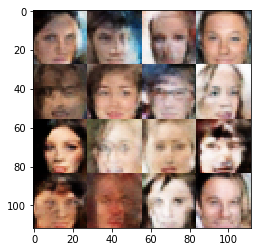

Epoch 1/1... Discriminator Loss: 1.8642... Generator Loss: 0.3912
Epoch 1/1... Discriminator Loss: 0.8058... Generator Loss: 1.7939
Epoch 1/1... Discriminator Loss: 1.1172... Generator Loss: 1.5132
Epoch 1/1... Discriminator Loss: 0.9289... Generator Loss: 1.4182
Epoch 1/1... Discriminator Loss: 0.9532... Generator Loss: 1.3190
Epoch 1/1... Discriminator Loss: 1.2394... Generator Loss: 1.8516
Epoch 1/1... Discriminator Loss: 0.9367... Generator Loss: 1.4438
Epoch 1/1... Discriminator Loss: 0.8446... Generator Loss: 1.6587
Epoch 1/1... Discriminator Loss: 1.0513... Generator Loss: 1.0219
Epoch 1/1... Discriminator Loss: 1.8596... Generator Loss: 0.4203


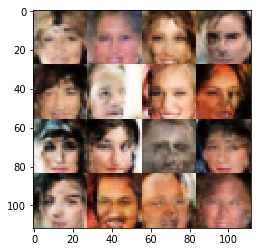

Epoch 1/1... Discriminator Loss: 1.1197... Generator Loss: 1.2030
Epoch 1/1... Discriminator Loss: 1.1855... Generator Loss: 0.8442
Epoch 1/1... Discriminator Loss: 1.5360... Generator Loss: 2.2648
Epoch 1/1... Discriminator Loss: 0.9983... Generator Loss: 1.2124
Epoch 1/1... Discriminator Loss: 0.7957... Generator Loss: 1.6893
Epoch 1/1... Discriminator Loss: 1.0882... Generator Loss: 1.8870
Epoch 1/1... Discriminator Loss: 1.0482... Generator Loss: 1.0094
Epoch 1/1... Discriminator Loss: 1.0477... Generator Loss: 1.3937
Epoch 1/1... Discriminator Loss: 1.1096... Generator Loss: 0.8969
Epoch 1/1... Discriminator Loss: 0.9760... Generator Loss: 1.4104


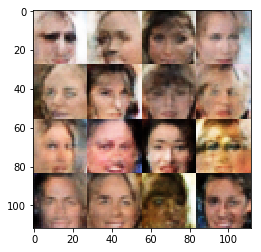

Epoch 1/1... Discriminator Loss: 1.0327... Generator Loss: 1.1138
Epoch 1/1... Discriminator Loss: 0.8483... Generator Loss: 1.6149
Epoch 1/1... Discriminator Loss: 1.1574... Generator Loss: 1.4712


In [14]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.